##Flight Price Prediction

##Problem Statement and Objective:

**Problem Statement:**
The aim of this project is to develop a flight price prediction model using data analysis techniques. The unpredictability of flight ticket prices poses a challenge for travelers in planning and budgeting their trips. By leveraging historical flight data, we seek to create models that accurately forecast future airfares.

**Objective:**
The primary objective of this project is to predict flight prices with high accuracy, enabling informed decision-making for travelers. Specifically, we aim to:
1. Analyze historical flight data to identify patterns and trends in ticket prices.
2. Develop machine learning models capable of predicting future airfares based on key features.
3. Evaluate and fine-tune the performance of the models to enhance prediction accuracy.

**Data Dictionary:**
- **Airline:** The name of the airline providing the flight service.
- **Date_of_Journey:** The date on which the flight journey is scheduled to take place.
- **Source:** The origin city or airport from which the flight service begins.
- **Destination:** The destination city or airport where the flight service ends.
- **Route:** The sequence of cities or airports visited by the flight en route to the destination.
- **Dep_Time:** The departure time of the flight from the source city or airport.
- **Arrival_Time:** The arrival time of the flight at the destination city or airport.
- **Duration:** The total duration of the flight from departure to arrival.
- **Total_Stops:** The number of stops or layovers between the source and destination.
- **Additional_Info:** Additional information or details about the flight service.
- **Price:** The price of the flight ticket.

##Importing necessary libraries and Data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# to build linear regression_model
import statsmodels.api as sm

# Libraries different ensemble regressors
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [3]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DecoderBot/Flight Price Prediction Task.csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Understand the shape of the dataset

In [7]:
data.shape

(10683, 11)

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


###Checking for missing values

In [11]:
# checking for missing values in the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
data= data.dropna()
data.shape

(10682, 11)

###Checking for duplicate values

In [14]:
# checking for duplicate values
data.duplicated().sum()

220

In [15]:
df=data.copy()
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
# Check the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame after removing duplicates: (10462, 11)


## Exploratory Data Analysis

###Statistical summary of dataset

In [17]:
df.describe(include='all').T

<ipython-input-17-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Airline,10462,12,Jet Airways,3700,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10462,40,2019-06-06 00:00:00,490,2019-03-01,2019-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10462,5,Delhi,4345,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10462,6,Cochin,4345,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10462,128,DEL ? BOM ? COK,2376,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10462,222,18:55,233,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10462,1343,19:00,412,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10462,368,2h 50m,544,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10462,5,1 stop,5625,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10462,10,No info,8182,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

- The dataset contains 10,462 records.
- Airline information includes 12 unique carriers, with Jet Airways being the most frequent (3,700 occurrences).
- Dates of journey span 40 unique days, with the most common date being 2019-06-06 (490 occurrences). The earliest date is 2019-03-01, and the latest date is 2019-06-27.
- Source airports feature 5 unique locations, predominantly Delhi (4,345 occurrences).
- Destinations encompass 6 unique cities, with Cochin being the most frequent (4,345 occurrences).
- Routes exhibit 128 unique combinations, with "DEL ? BOM ? COK" being the most common (2,376 occurrences).
- Departure times vary across 222 unique values, with 18:55 being the most frequent (233 occurrences).
- Arrival times span 1,343 unique instances, with 19:00 being the most common (412 occurrences).
- Flight durations range across 368 unique values, with "2h 50m" being the most frequent (544 occurrences).
- Total stops during flights range from non-stop to 4 stops, with "1 stop" being the most common (5,625 occurrences).
- Additional information provided for flights includes 10 unique categories, with "No info" being the most common (8,182 occurrences).
- Flight prices range from ₹1,759 to ₹79,512, with an average price of ₹9,026.79 and a standard deviation of ₹4,624.85. The median price is ₹8,266.

###Unique Values in dataset

In [18]:
df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [19]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------------------------------
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
--------------------------------------------------
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
--------------------------------------------------
DEL ? BOM ? COK          2376
BLR ? DEL                1536
CCU

### Functions for EDA

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Univariate Analysis

####Price

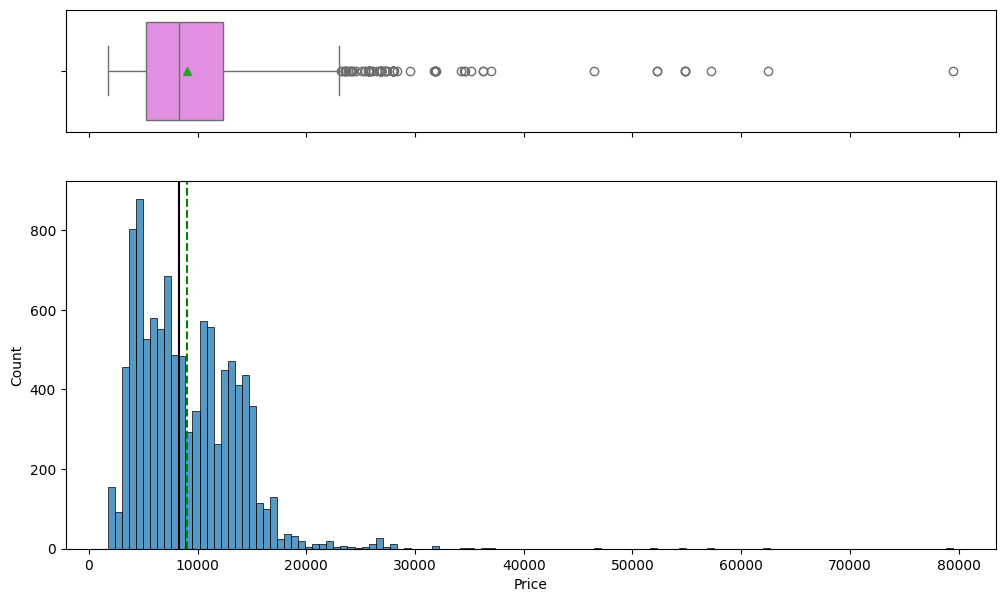

In [22]:
histogram_boxplot(df,'Price')

####Categorical Variables

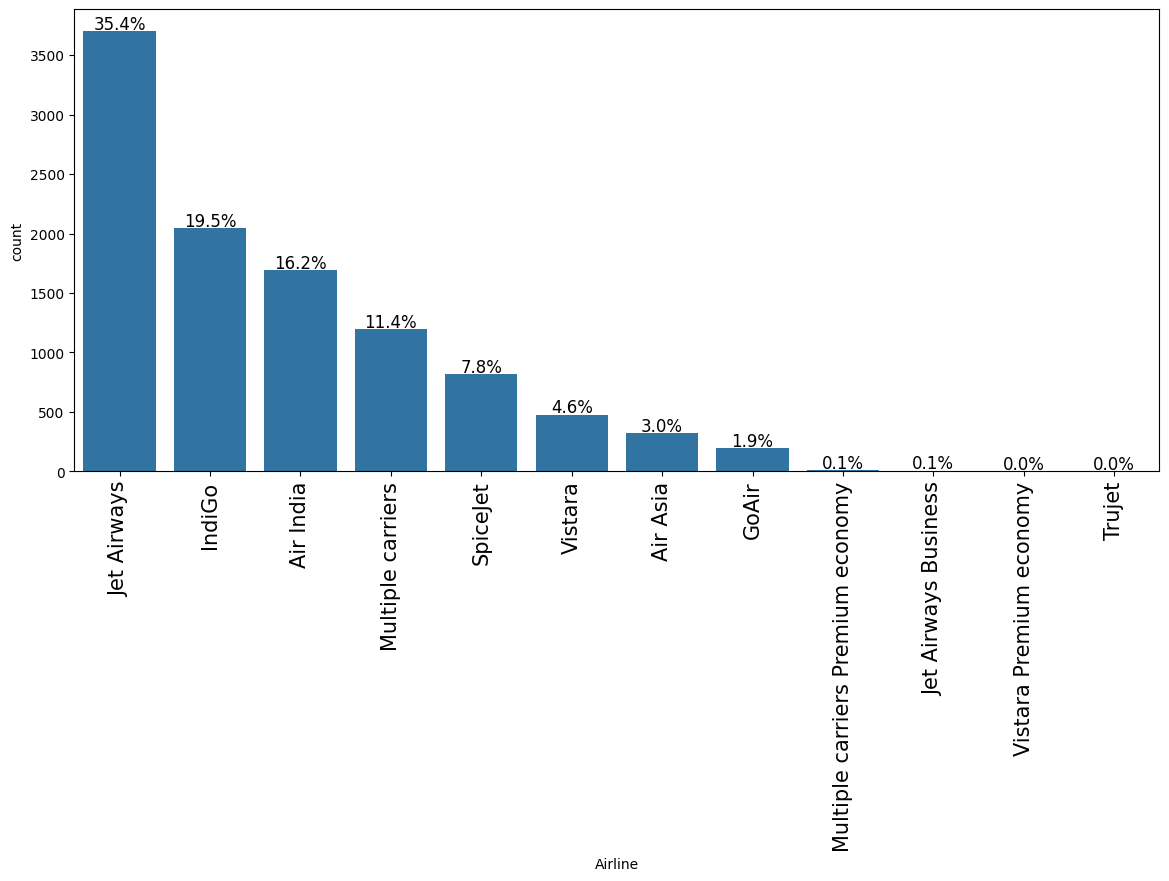

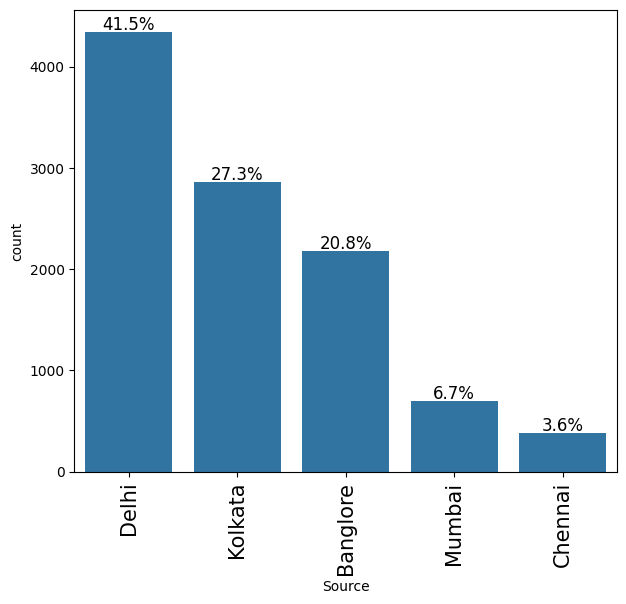

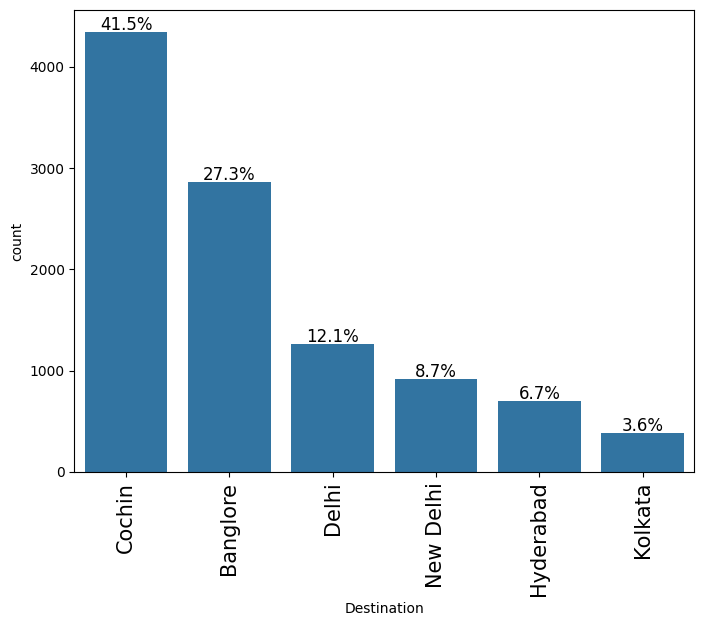

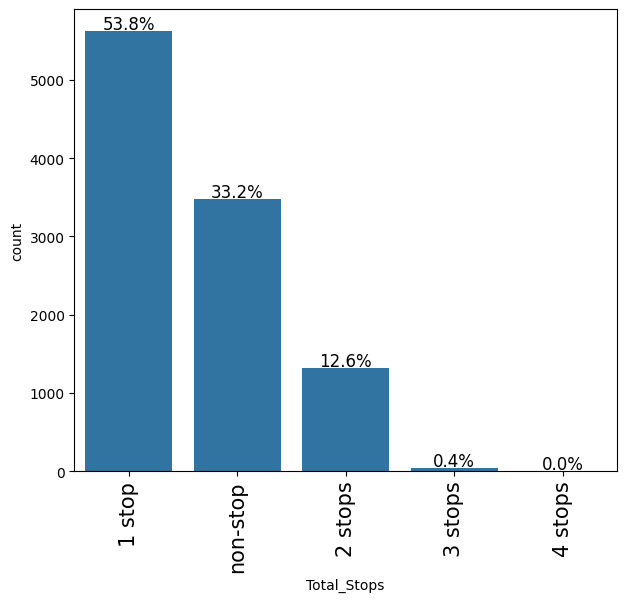

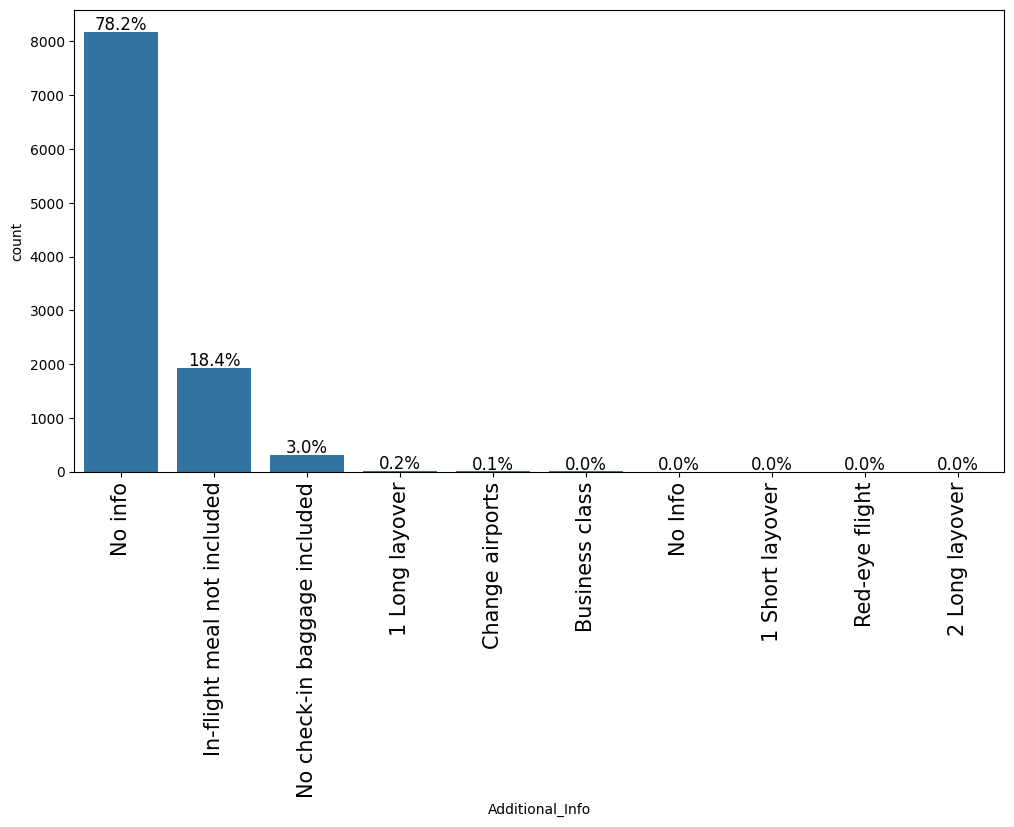

In [23]:
features = ['Airline', 'Source', 'Destination','Total_Stops', 'Additional_Info']

for feature in features:
    labeled_barplot(df, feature,perc=True)

####Observations on Univariate Analysis

* The price distribution exhibits a nearly normal shape, albeit with a significant number of outliers skewing towards the higher end, resulting in a long right tail. The mean price is approximately 9500, with Kolkata being a notable outlier in this regard.

* In the 'Additional Info' column, nearly 78.2% of the entries are labeled as 'No info', followed by 'Meal not included' at around 18.4%.

* Approximately 53% of flight trips involve one stop, while around 33% are non-stop journeys. Only a fraction, less than 0.5%, opt for trips with 3 or 4 stops.

* Cochin emerges as the most frequented destination, accounting for 41% of trips, followed closely by Bangalore at 27%.

* In terms of departure locations, Delhi is the most common starting point, representing 41% of trips, followed by Kolkata at 27%.

* Jet Airways holds the lion's share of the airline market, covering approximately 35% of all trips, followed by Indigo at 19.5% and Air India at 16.2%.

###Bivariate Analysis

In [24]:
# Selecting pairs of features for bivariate analysis
cat_features = ['Airline', 'Additional_Info','Source', 'Destination', 'Total_Stops' ]
num_features = ['Price']

####Categorical vs numerical variables

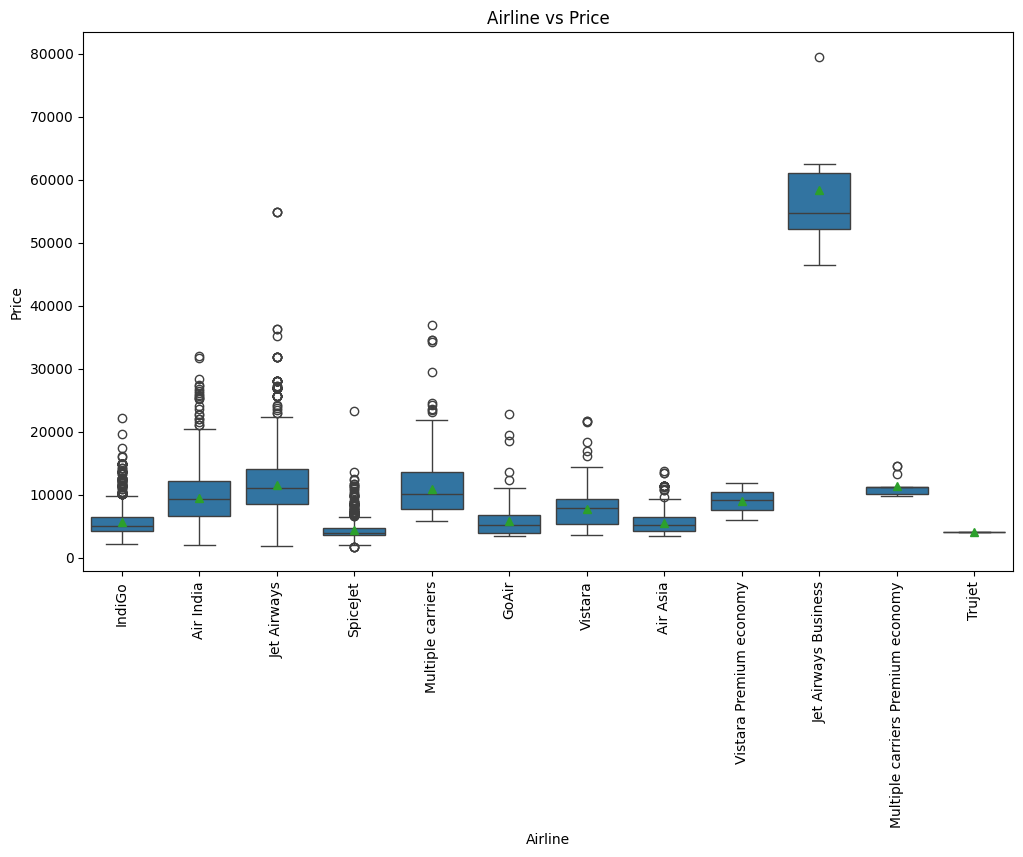

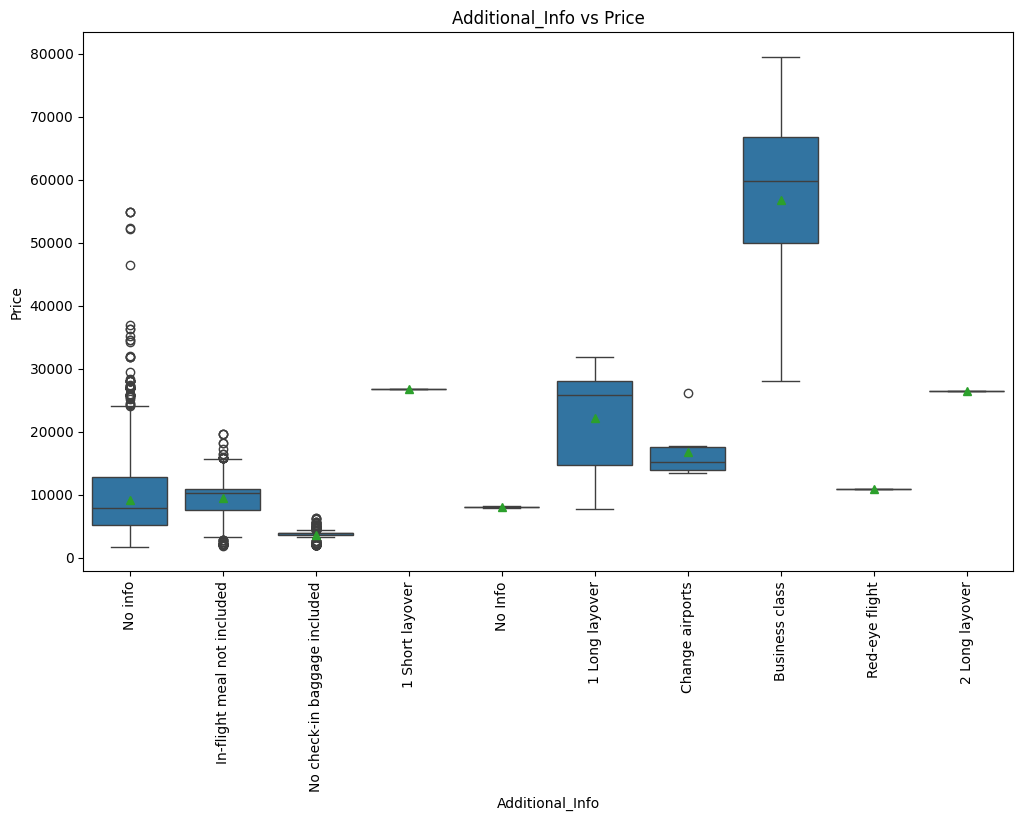

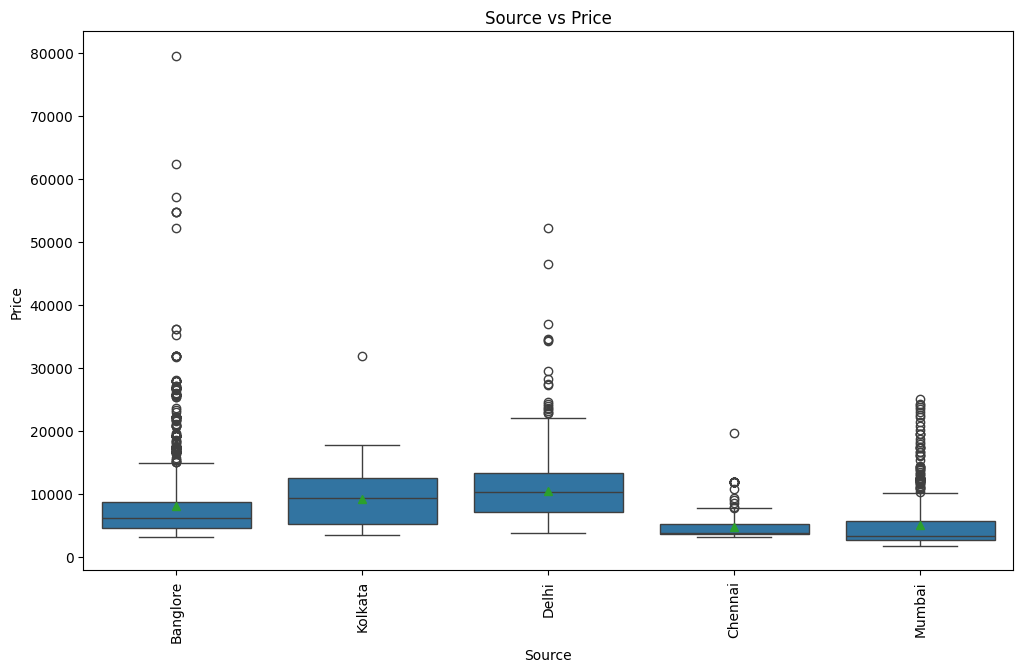

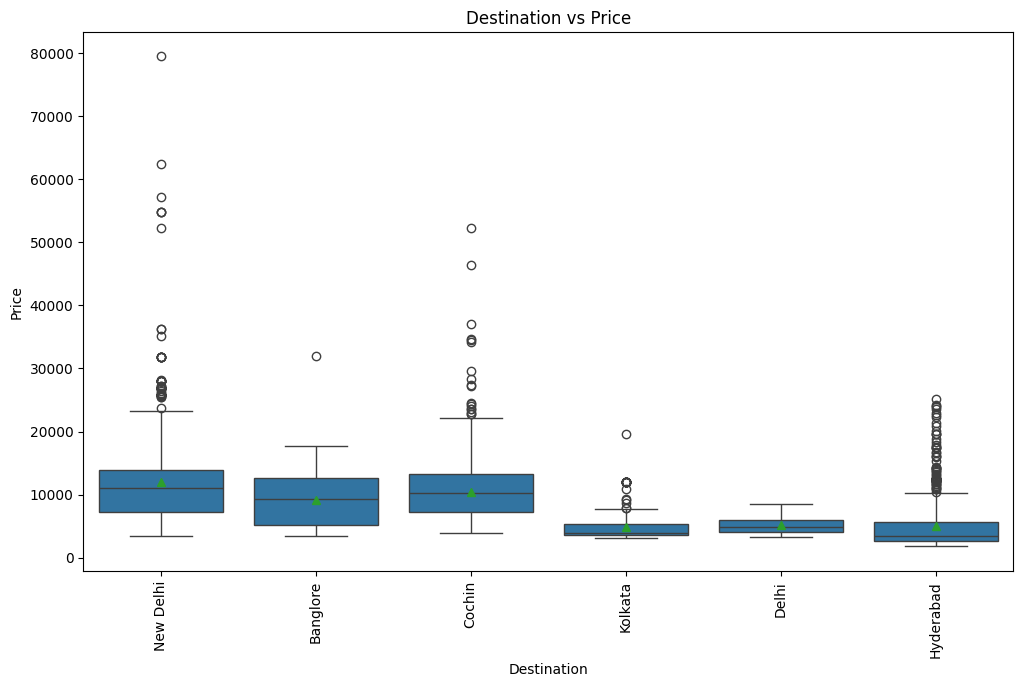

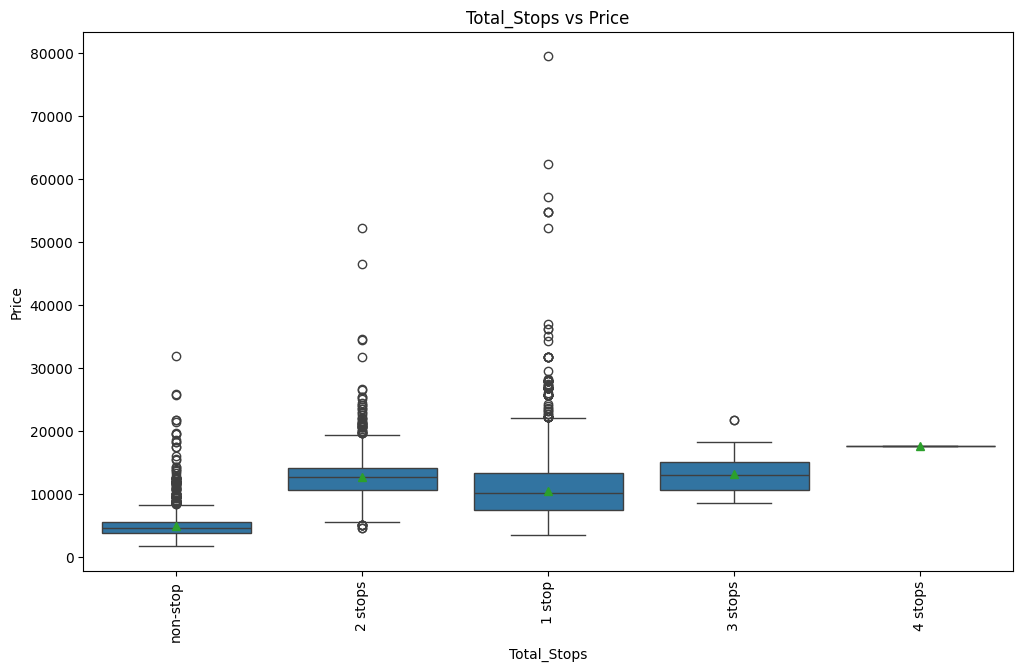

In [25]:

# Bivariate analysis for categorical vs numerical variables
def bivariate_categorical_numerical(data, cat_feature, num_feature):
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=cat_feature, y=num_feature, data=data,showmeans=True)
    plt.xticks(rotation=90)
    plt.title(f'{cat_feature} vs {num_feature}')
    plt.show()

# Perform bivariate analysis for categorical vs numerical variables
for cat_feature in cat_features:
    for num_feature in num_features:
        bivariate_categorical_numerical(df, cat_feature, num_feature)



####Categorical vs categorical variables

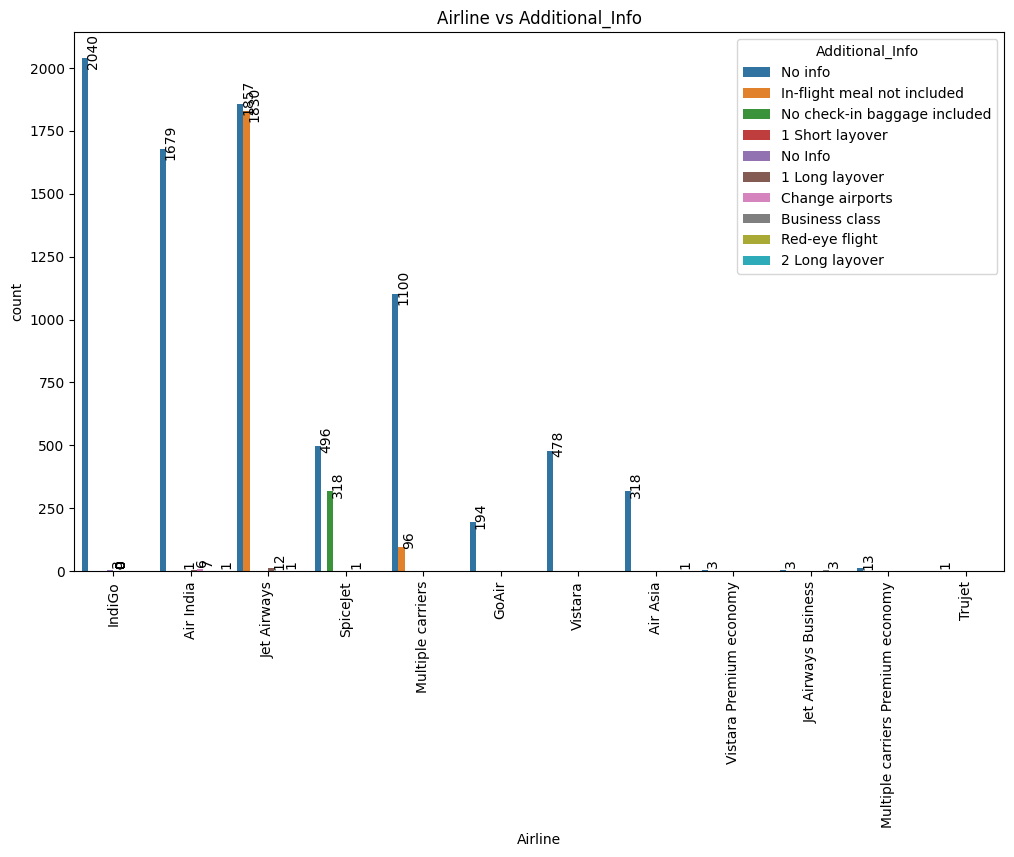

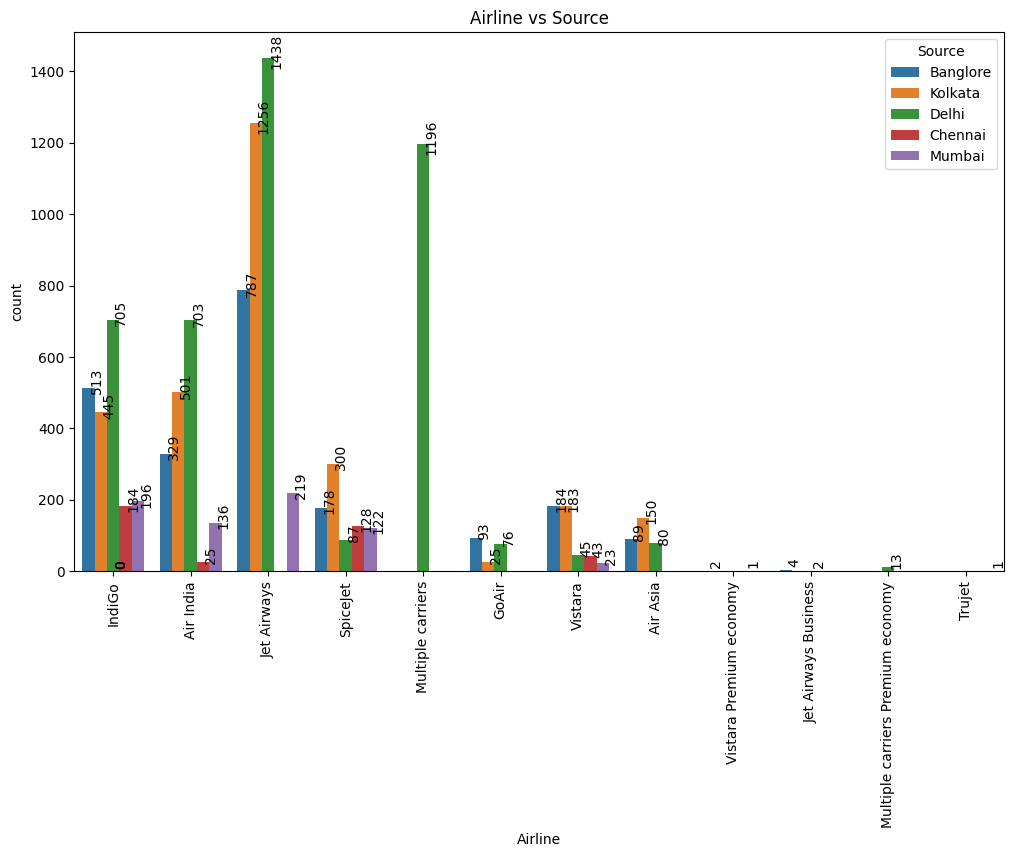

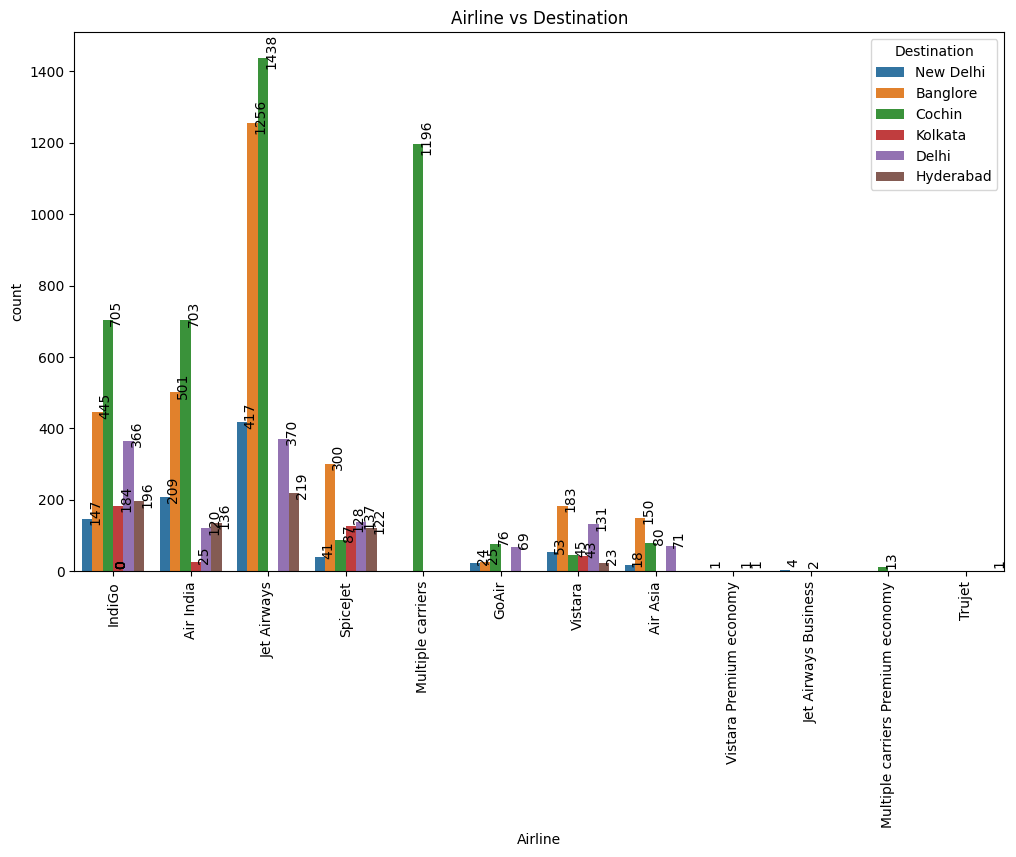

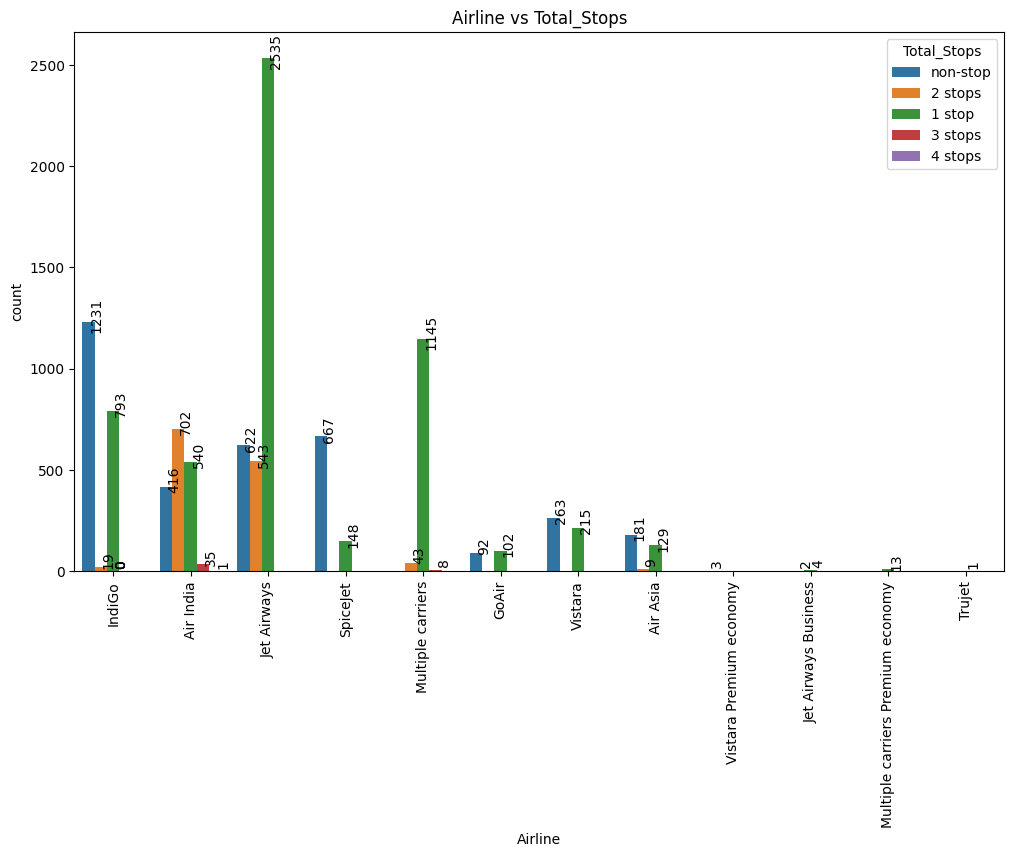

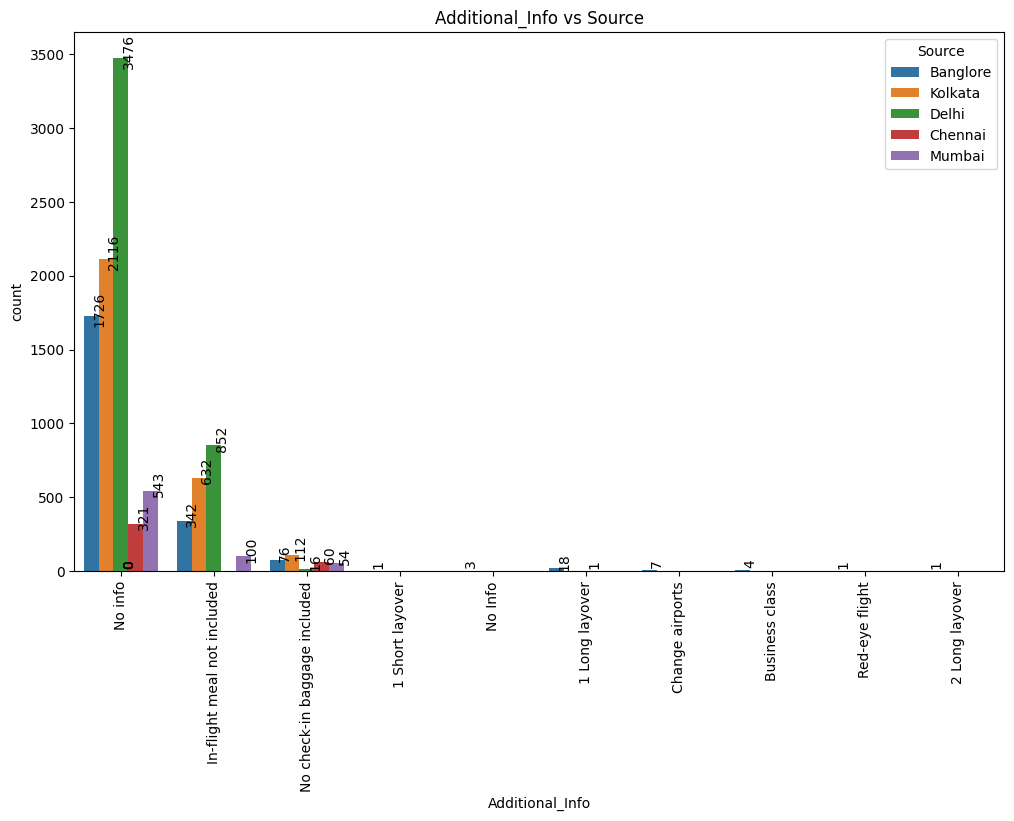

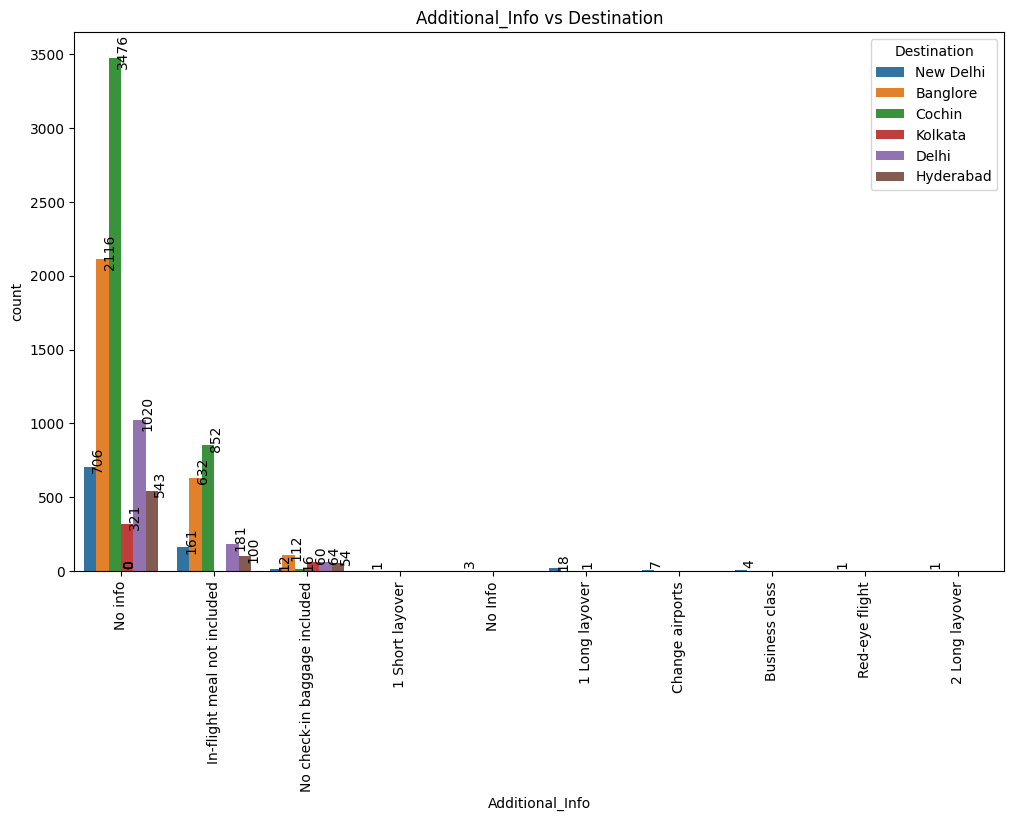

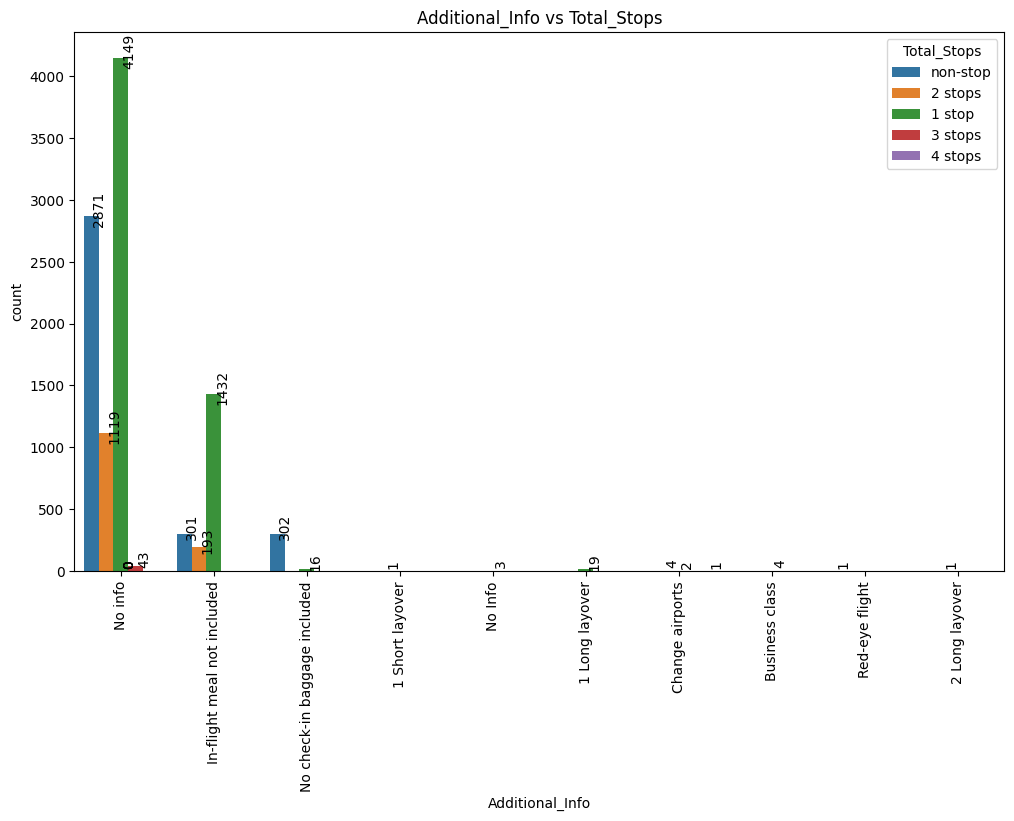

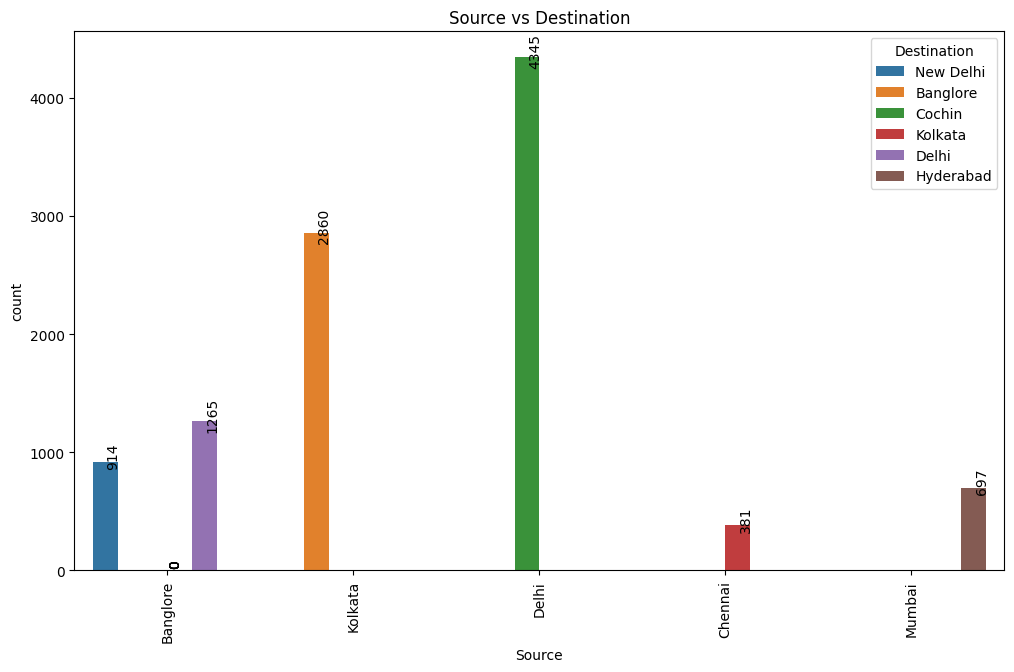

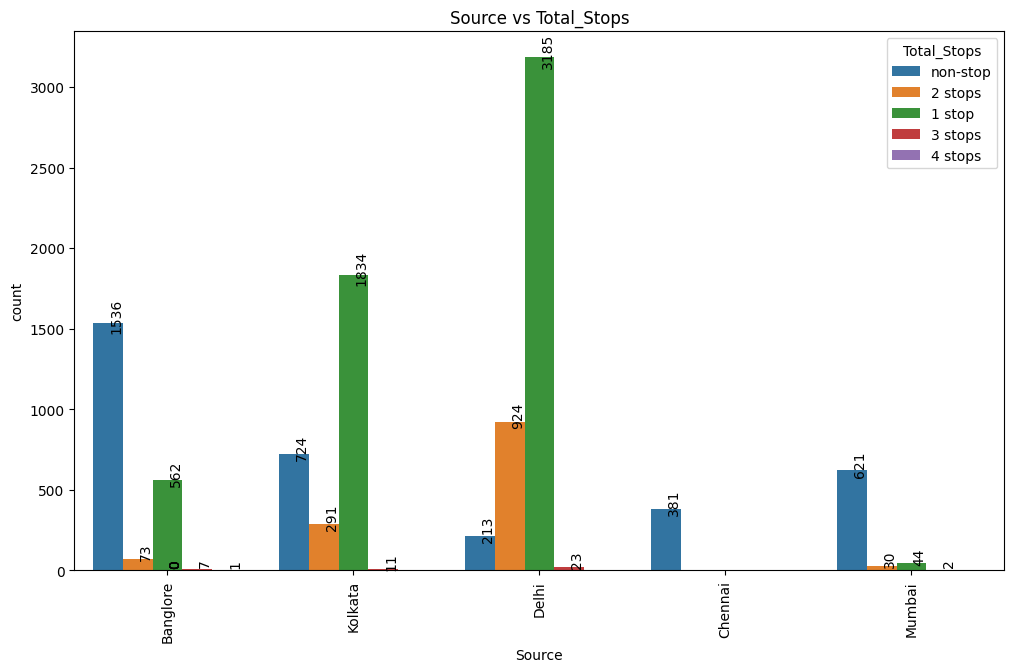

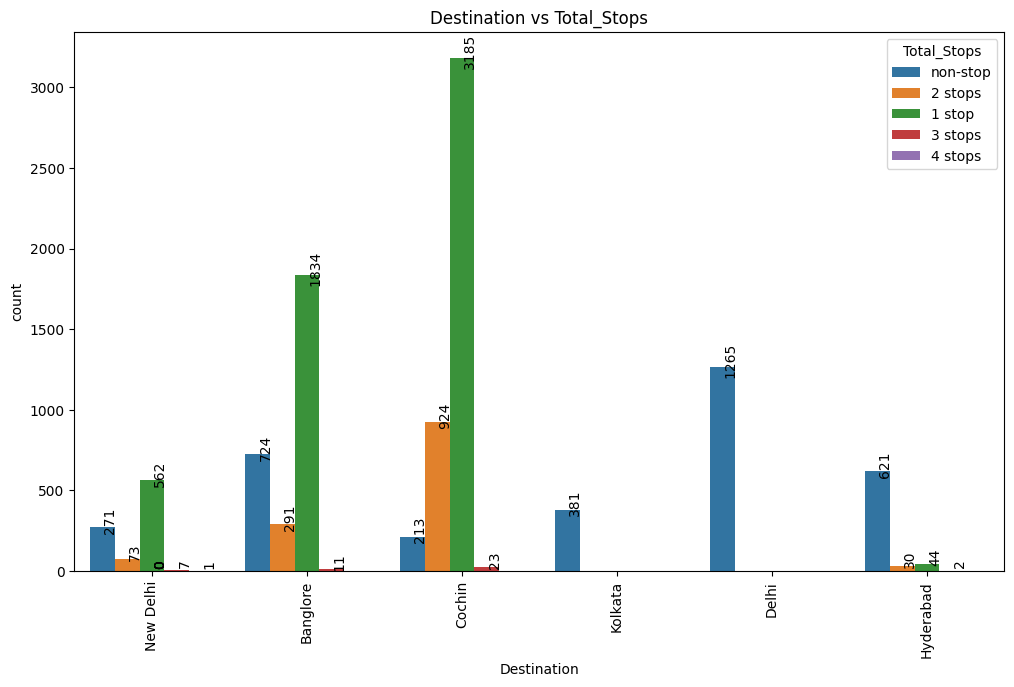

In [26]:
# Bivariate analysis for categorical vs categorical variables
def bivariate_categorical_categorical(data, cat_feature1, cat_feature2):
    plt.figure(figsize=(12, 7))
    ax=sns.countplot(x=cat_feature1, hue=cat_feature2, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{cat_feature1} vs {cat_feature2}')
    plt.legend(title=cat_feature2)
    for p in ax.patches:
      ax.annotate(f'\n{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2.,p.get_height()),
                  ha='center',
                  va='center',
                  fontsize=10,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=90)
    plt.show()
    plt.show()

# Perform bivariate analysis for categorical vs categorical variables
for i in range(len(cat_features)):
    for j in range(i+1, len(cat_features)):
        bivariate_categorical_categorical(df, cat_features[i], cat_features[j])

#### Aggregation of Prices with Categorical variables

In [27]:
def bivariate_categorical_numerical_grouped(data, cat_feature, num_feature):
    grouped_data = data.groupby(cat_feature)[num_feature].agg(['mean', 'min', 'max']).reset_index()
    print(grouped_data)

# Selecting categorical and numerical features for analysis
cat_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
num_features = ['Price']

#bivariate analysis for each combination of categorical and numerical variables
for cat_feature in cat_features:
    for num_feature in num_features:
        print(f'Analysis for {cat_feature} vs {num_feature}:')
        bivariate_categorical_numerical_grouped(df, cat_feature, num_feature)
        print('\n')

Analysis for Airline vs Price:
                              Airline          mean    min    max
0                            Air Asia   5590.260188   3383  13774
1                           Air India   9556.608028   2050  31945
2                               GoAir   5861.056701   3398  22794
3                              IndiGo   5668.469897   2227  22153
4                         Jet Airways  11599.021081   1840  54826
5                Jet Airways Business  58358.666667  46490  79512
6                   Multiple carriers  10902.678094   5797  36983
7   Multiple carriers Premium economy  11418.846154   9845  14629
8                            SpiceJet   4335.841718   1759  23267
9                              Trujet   4140.000000   4140   4140
10                            Vistara   7801.355649   3687  21730
11            Vistara Premium economy   8962.333333   5969  11793


Analysis for Source vs Price:
     Source          mean   min    max
0  Banglore   8022.872877  3257  79512
1

####Routes vs Price

In [28]:
#Top10 expensive Routes by Airlines
df.groupby(['Airline', 'Route'])['Price'].mean().sort_values(ascending=False).head(10)

Airline               Route                
Jet Airways Business  BLR ? BOM ? DEL          64722.666667
                      BLR ? MAA ? DEL          57209.000000
                      DEL ? ATQ ? BOM ? COK    49387.500000
Jet Airways           BOM ? DED ? DEL ? HYD    24115.000000
Air India             BOM ? JDH ? DEL ? HYD    23879.000000
Jet Airways           BOM ? JDH ? DEL ? HYD    23843.000000
                      BOM ? VNS ? DEL ? HYD    23528.000000
                      BOM ? UDR ? DEL ? HYD    22950.000000
                      BOM ? BDQ ? DEL ? HYD    22792.500000
                      BOM ? IDR ? DEL ? HYD    20845.000000
Name: Price, dtype: float64

In [29]:
#Top 10 Economical Routes by Airlines
df.groupby(['Airline', 'Route'])['Price'].mean().sort_values(ascending=True).head(10)

Airline    Route          
SpiceJet   BOM ? HYD          2419.859504
Air India  BOM ? HYD          3448.704082
GoAir      CCU ? BLR          3514.000000
IndiGo     BOM ? HYD          3639.194872
SpiceJet   MAA ? CCU          3993.523438
           CCU ? BLR          4037.822581
Trujet     BOM ? NDC ? HYD    4140.000000
GoAir      CCU ? HYD ? BLR    4223.000000
SpiceJet   BLR ? DEL          4289.847059
Air Asia   CCU ? BLR          4413.054348
Name: Price, dtype: float64

In [30]:
# Group the data by source, destination, and airline, and calculate the mean price for each combination
avg_price_airlines =df.groupby(['Source', 'Destination', 'Airline']).agg({'Price': 'min'}).reset_index()

# Find the cheapest routes for each source and destination
cheapest_routes = avg_price_airlines.groupby(['Source', 'Destination']).apply(lambda x: x.loc[x['Price'].idxmin()]).reset_index(drop=True)

# Display the cheapest routes for each source and their average prices along with the airline
for source in cheapest_routes['Source'].unique():
    cheapest_destinations = cheapest_routes[cheapest_routes['Source'] == source]
    print(f"\nCheapest routes from {source}:")
    for index, row in cheapest_destinations.iterrows():
        print(f"{row['Destination']} with {row['Airline']}: ₹{row['Price']:.2f}")


Cheapest routes from Banglore:
Delhi with SpiceJet: ₹3257.00
New Delhi with Air Asia: ₹3383.00

Cheapest routes from Chennai:
Kolkata with Air India: ₹3145.00

Cheapest routes from Delhi:
Cochin with GoAir: ₹3876.00

Cheapest routes from Kolkata:
Banglore with IndiGo: ₹3480.00

Cheapest routes from Mumbai:
Hyderabad with SpiceJet: ₹1759.00


In [31]:
df.groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  Delhi           5143.918577
          New Delhi      12007.421225
Chennai   Kolkata         4789.892388
Delhi     Cochin         10461.600690
Kolkata   Banglore        9143.083566
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

<Axes: xlabel='Source', ylabel='Price'>

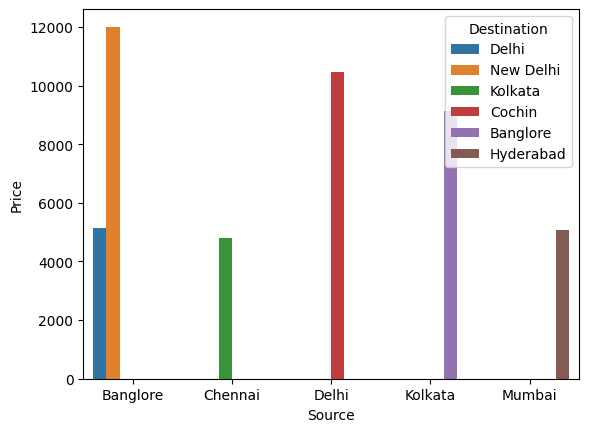

In [32]:
avg_price_destinations = df.groupby(['Source', 'Destination'])['Price'].mean().reset_index()
sns.barplot(data=avg_price_destinations, x='Source', y='Price', hue='Destination')

####Duration vs Price

In [33]:
# Convert the Duration column to minutes
df['Duration_minutes'] = df['Duration'].str.split().apply(lambda x: int(x[0][:-1]) * 60 + int(x[-1][:-1]))

# Define a threshold for long-duration flights (e.g., flights longer than 6 hours)
long_duration_threshold = 6 * 60  # 6 hours converted to minutes

# Filter flights with duration longer than the threshold
long_duration_flights =df[df['Duration_minutes'] > long_duration_threshold]

print("Long-duration flight routes with airline and price:")
long_duration_flights.sort_values(by='Duration_minutes',ascending=False).head(10)

Long-duration flight routes with airline and price:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_minutes
1067,Jet Airways,2019-03-03,Delhi,Cochin,DEL ? IDR ? BOM ? COK,05:25,04:25 05 Mar,47h,2 stops,No info,20064,2867
10456,Jet Airways,2019-03-06,Delhi,Cochin,DEL ? AMD ? BOM ? COK,19:10,18:50 08 Mar,47h 40m,2 stops,No info,20694,2860
8409,Jet Airways,2019-03-21,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,04:25 23 Mar,42h 45m,2 stops,No info,12819,2565
5953,Jet Airways,2019-03-21,Delhi,Cochin,DEL ? IDR ? BOM ? COK,10:20,04:25 23 Mar,42h 5m,2 stops,No info,11664,2525
7906,Air India,2019-03-24,Kolkata,Banglore,CCU ? GAU ? DEL ? BLR,05:55,23:15 25 Mar,41h 20m,2 stops,No info,13990,2480
10326,Air India,2019-03-03,Banglore,New Delhi,BLR ? CCU ? GAU ? DEL,05:50,22:10 07 Mar,40h 20m,2 stops,No info,11791,2420
6321,Air India,2019-03-01,Banglore,New Delhi,BLR ? BOM ? AMD ? DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,2345
4463,Air India,2019-06-01,Delhi,Cochin,DEL ? RPR ? NAG ? BOM ? COK,05:15,19:15 02 Jun,38h,3 stops,No info,10703,2318
8601,Air India,2019-05-27,Delhi,Cochin,DEL ? RPR ? NAG ? BOM ? COK,05:15,19:15 28 May,38h,3 stops,No info,10493,2318
8729,Air India,2019-06-24,Delhi,Cochin,DEL ? RPR ? NAG ? BOM ? COK,05:15,19:15 25 Jun,38h,3 stops,No info,10493,2318


####Observations on Bivariate Analysis



**Airline vs Price:**
- The average ticket price varies significantly among different airlines.
- Jet Airways Business has the highest average price, followed by Multiple carriers and Multiple carriers Premium economy.
- Trujet and SpiceJet have relatively lower average prices compared to other airlines.

**Source vs Price:**
- The average ticket price varies depending on the source city.
- Flights originating from Delhi have the highest average price, while flights from Chennai tend to have the lowest average price.

**Destination vs Price:**
- The average ticket price varies depending on the destination city.
- Flights to New Delhi have the highest average price, while flights to Kolkata tend to have the lowest average price.

**Total_Stops vs Price:**
- The number of stops in a flight affects the ticket price significantly.
- Flights with 4 stops have the highest average price, followed by flights with 3 stops and 2 stops.
- Non-stop flights have the lowest average price.

**Additional_Info vs Price:**
- The type of additional information provided for the flight also impacts the ticket price.
- Business class flights have the highest average price, followed by flights with a 1 Long layover and 2 Long layover.
- Flights with 'No check-in baggage included' and 'No info' have relatively lower average prices.

**Routes vs Airline - Price**
- The top 10 expensive flight routes include routes operated by Jet Airways Business, with the route from BLR to BOM to DEL being the priciest, averaging ₹64,722.67.
- Conversely, the most economical routes feature domestic connections like BOM to HYD by SpiceJet, priced at ₹2,419.86. These insights offer travelers valuable information for budget-conscious planning and informed decision-making when booking flights.

**Airlines vs Source/Destinations vs Price**
- The cheapest routes from various cities, showcasing affordability for travelers. For instance, from Bangalore, SpiceJet offers the most economical fare to Delhi at ₹3,257, while Air Asia provides a budget-friendly option to New Delhi at ₹3,383.
- From Chennai, Air India offers the cheapest fare to Kolkata at ₹3,145. Similarly, in Delhi, GoAir provides an economical option to Cochin at ₹3,876. Moreover, from Kolkata, travelers can find the most affordable route to Bangalore with IndiGo, priced at ₹3,480.

**Duration of Flights vs prices**

- Long-duration flights with durations ranging from 38 hours to 47 hours and 40 minutes are mainly operated by Jet Airways and Air India.
- These flights typically involve multiple stops, with routes spanning from Delhi to Cochin, Delhi to Bangalore via Kolkata and Guwahati, and Bangalore to New Delhi via Mumbai and Ahmedabad.
- The prices for these flights vary but tend to be relatively high, ranging from 2318 to 20694 rupees.
- The longest duration flight recorded is 47 hours and 40 minutes, belonging to Jet Airways, departing from Delhi and arriving in Cochin via Ahmedabad and Mumbai.

##Data Cleaning


The dataset contains various formats for Arrival time, and the goal is to unify them into a single standardized format.

In [34]:
# Extract entries with both time and date
df_with_date = df[df['Arrival_Time'].str.contains(r'\d{2}:\d{2} \d{2} [A-Z][a-z]{2}', regex=True)].copy()
df_with_date['Arrival_Time'] = pd.to_datetime(df_with_date['Arrival_Time'], format='%H:%M %d %b')

# Extract entries with only time
df_without_date = df[~df['Arrival_Time'].str.contains(r'\d{2}:\d{2} \d{2} [A-Z][a-z]{2}', regex=True)].copy()
df_without_date['Arrival_Time'] = pd.to_datetime(df_without_date['Arrival_Time'], format='%H:%M')

# Concatenate both cleaned dataframes
cleaned_df = pd.concat([df_with_date, df_without_date])

# Impute year as 2019 for all rows in Arrival_Time column
cleaned_df['Arrival_Time'] = cleaned_df['Arrival_Time'].apply(lambda x: x.replace(year=2019))


In [35]:
# Display the cleaned DataFrame
cleaned_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,2019-03-22 01:10:00,2h 50m,non-stop,No info,3897,170
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2019-06-10 04:25:00,19h,2 stops,No info,13882,1159
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,2019-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,2019-03-02 05:05:00,21h 5m,1 stop,No info,22270,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,2019-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,1530


In [36]:
cleaned_df['day_journey'] = cleaned_df['Date_of_Journey'].dt.day
cleaned_df['month_journey'] = cleaned_df['Date_of_Journey'].dt.month
cleaned_df['year_journey'] = cleaned_df['Date_of_Journey'].dt.year


# Convert Arrival_Time to datetime and extract hour and minutes
cleaned_df['arrival_hour'] = pd.to_datetime(cleaned_df['Arrival_Time']).dt.hour
cleaned_df['arrival_minutes'] = pd.to_datetime(cleaned_df['Arrival_Time']).dt.minute

# Convert Dep_Time to datetime and extract hour and minutes
cleaned_df['dep_hour'] = pd.to_datetime(cleaned_df['Dep_Time']).dt.hour
cleaned_df['dep_minutes'] = pd.to_datetime(cleaned_df['Dep_Time']).dt.minute

In [37]:
cleaned_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_minutes,day_journey,month_journey,year_journey,arrival_hour,arrival_minutes,dep_hour,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,2019-03-22 01:10:00,2h 50m,non-stop,No info,3897,170,24,3,2019,1,10,22,20
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2019-06-10 04:25:00,19h,2 stops,No info,13882,1159,9,6,2019,4,25,9,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,2019-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,930,12,3,2019,10,25,18,55
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,2019-03-02 05:05:00,21h 5m,1 stop,No info,22270,1265,1,3,2019,5,5,8,0
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,2019-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,1530,12,3,2019,10,25,8,55


In [38]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10462 non-null  object        
 1   Date_of_Journey   10462 non-null  datetime64[ns]
 2   Source            10462 non-null  object        
 3   Destination       10462 non-null  object        
 4   Route             10462 non-null  object        
 5   Dep_Time          10462 non-null  object        
 6   Arrival_Time      10462 non-null  datetime64[ns]
 7   Duration          10462 non-null  object        
 8   Total_Stops       10462 non-null  object        
 9   Additional_Info   10462 non-null  object        
 10  Price             10462 non-null  int64         
 11  Duration_minutes  10462 non-null  int64         
 12  day_journey       10462 non-null  int64         
 13  month_journey     10462 non-null  int64         
 14  year_journey      1046

In [39]:
# Convert month_journey to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
cleaned_df['month_journey'] = cleaned_df['month_journey'].apply(lambda x: month_map[x])

# Convert day_journey and month_journey to categorical
cleaned_df['day_journey'] = cleaned_df['day_journey'].astype('category')
cleaned_df['month_journey'] = cleaned_df['month_journey'].astype('category')

In [40]:
cleaned_df['year_journey'].unique()

array([2019])

Creating a column Day_details to understand about weekday/weekend

In [41]:
# Create a new column to store the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
cleaned_df['Day_of_Week'] = cleaned_df['Date_of_Journey'].dt.weekday

# Map the day of the week to 'weekday' or 'weekend' based on its value
cleaned_df['day_details'] = cleaned_df['Day_of_Week'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

# Display the DataFrame with the new column
print(cleaned_df[['Date_of_Journey', 'Day_of_Week', 'day_details']].head())

  Date_of_Journey  Day_of_Week day_details
0      2019-03-24            6     weekend
2      2019-06-09            6     weekend
6      2019-03-12            1     weekday
7      2019-03-01            4     weekday
8      2019-03-12            1     weekday


In [42]:
data_clean_v2= cleaned_df.copy()
data_clean_v2.drop(columns=['Date_of_Journey', 'Arrival_Time', 'Dep_Time','year_journey','Duration'], inplace=True)
data_clean_v2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_minutes,day_journey,month_journey,arrival_hour,arrival_minutes,dep_hour,dep_minutes,Day_of_Week,day_details
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,170,24,March,1,10,22,20,6,weekend
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,1159,9,June,4,25,9,25,6,weekend
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,930,12,March,10,25,18,55,1,weekday
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,22270,1265,1,March,5,5,8,0,4,weekday
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,1530,12,March,10,25,8,55,1,weekday


Cleaning data for Additional Info column

In [43]:
data_clean_v2['Additional_Info'] = data_clean_v2['Additional_Info'].str.lower()

# Replace similar or synonymous values with a common representation
data_clean_v2['Additional_Info'].replace({
    'no info': 'no info',
    'in-flight meal not included': 'no meal',
    'no check-in baggage included': 'no baggage',
    '1 long layover': 'long layover',
    '2 long layover': 'long layover',
    'change airports': 'change airports',
    'business class': 'business class',
    '1 short layover': 'short layover',
    'red-eye flight': 'red-eye flight'
}, inplace=True)

data_clean_v2['Additional_Info'].unique()

array(['no info', 'no meal', 'no baggage', 'long layover',
       'change airports', 'red-eye flight', 'short layover',
       'business class'], dtype=object)

Ensuring data consistency all through the dataset

In [44]:
# Replace similar or synonymous values with a common representation
data_clean_v2['Airline'].replace({
    'Jet Airways Business': 'Jet Airways',
    'Multiple carriers Premium economy': 'Multiple carriers',
    'Vistara Premium economy': 'Vistara'
}, inplace=True)

# Display unique values to verify the cleaning
print(data_clean_v2['Airline'].unique())

['IndiGo' 'Jet Airways' 'Air India' 'Air Asia' 'Multiple carriers'
 'Vistara' 'GoAir' 'SpiceJet' 'Trujet']


In [45]:
data_clean_v2['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

The 'Destination' column contains entries for both "New Delhi" and "Delhi." To ensure consistency, all entries are standardized to "Delhi."

In [46]:
data_clean_v2['Destination'].replace({
    'New Delhi': 'Delhi'
}, inplace=True)

# Display unique values to verify the cleaning
print(data_clean_v2['Destination'].unique())

['Delhi' 'Cochin' 'Banglore' 'Hyderabad' 'Kolkata']


This standardizes the representation of the number of stops for each flight in the dataset.

In [47]:
data_clean_v2['Total_Stops'] = data_clean_v2['Total_Stops'].replace({
    'non-stop': '0',
    '1 stop': '1',
    '2 stops': '2',
    '3 stops': '3',
    '4 stops': '4'
})

In [48]:
#Lets check the statistical summary after data preprocessing and feature engineering
data_clean_v2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10462,9,Jet Airways,3706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10462,5,Delhi,4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10462,5,Cochin,4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10462,128,DEL ? BOM ? COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10462,5,1,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10462,8,no info,8185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10462.0,NaN,NaN,NaN,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0
Duration_minutes,10462.0,NaN,NaN,NaN,630.876219,501.510421,75.0,170.0,505.0,915.0,2867.0
day_journey,10462.0,10.0,9.0,1375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_journey,10462,4,May,3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- The average duration of flights, converted into minutes, is around 630 minutes, with a standard deviation of 502 minutes.
- The most common month for journeys is May, with 3395 occurrences.
- The average arrival hour is approximately 13:23, and the average departure hour is around 12:29.
- Most flights occur on weekdays, with 7390 out of 10462 flights happening during weekdays.

##Model Building

###Data Preparation

In [49]:
data_clean_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Airline           10462 non-null  object  
 1   Source            10462 non-null  object  
 2   Destination       10462 non-null  object  
 3   Route             10462 non-null  object  
 4   Total_Stops       10462 non-null  object  
 5   Additional_Info   10462 non-null  object  
 6   Price             10462 non-null  int64   
 7   Duration_minutes  10462 non-null  int64   
 8   day_journey       10462 non-null  category
 9   month_journey     10462 non-null  category
 10  arrival_hour      10462 non-null  int64   
 11  arrival_minutes   10462 non-null  int64   
 12  dep_hour          10462 non-null  int64   
 13  dep_minutes       10462 non-null  int64   
 14  Day_of_Week       10462 non-null  int64   
 15  day_details       10462 non-null  object  
dtypes: category(2), int64(

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_columns = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'day_journey', 'month_journey','Day_of_Week','day_details']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column
for col in cat_columns:
    # Check number of unique values in the column
    unique_values = data_clean_v2[col].nunique()

    # Apply label encoding if number of unique values <= threshold
    if unique_values >= 7:
        data_clean_v2[col] = label_encoder.fit_transform(data_clean_v2[col])
    # Apply one-hot encoding otherwise
    else:
        data_clean_v2 = pd.get_dummies(data_clean_v2, columns=[col], drop_first=True)

In [51]:
data_clean_v2.head()

,Airline,Route,Additional_Info,Price,Duration_minutes,day_journey,arrival_hour,arrival_minutes,dep_hour,dep_minutes,Day_of_Week,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,month_journey_June,month_journey_March,month_journey_May,day_details_weekend
0,3,18,4,3897,170,8,1,10,22,20,6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,4,118,4,13882,1159,3,4,25,9,25,6,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
6,4,5,5,11087,930,4,10,25,18,55,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
7,4,5,4,22270,1265,0,5,5,8,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
8,4,5,5,11087,1530,4,10,25,8,55,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [52]:
data_clean_v2.shape

(10462, 27)

In [53]:
data_clean_v2.isna().sum()

Airline                  0
Route                    0
Additional_Info          0
Price                    0
Duration_minutes         0
day_journey              0
arrival_hour             0
arrival_minutes          0
dep_hour                 0
dep_minutes              0
Day_of_Week              0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Total_Stops_1            0
Total_Stops_2            0
Total_Stops_3            0
Total_Stops_4            0
month_journey_June       0
month_journey_March      0
month_journey_May        0
day_details_weekend      0
dtype: int64

In [54]:
data_clean=data_clean_v2.copy()
# Separate features (X) and target (y)
X = data_clean.drop(columns=['Price'])
y = data_clean['Price']

###Data Split into Training, Validation and testing

In [55]:
# Split data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [56]:
X_train.shape, X_val.shape, X_test.shape

((6276, 26), (2093, 26), (2093, 26))

### Model Building - Strategy and Evaluation

1. **Strategy:**
   - Various regression algorithms such as Linear Regression, Random Forest Regression, Gradient Boosting Regression, etc., will be considered for modeling.
   - We will fit different models on the training data and observe their performance.
   - Hyperparameter tuning will be performed using techniques like GridSearchCV to optimize the model's performance.
   - We will assess the models' performance using metrics like R-squared (coefficient of determination), which measures the proportion of the variance in the target variable that is predictable from the independent variables.

2. **Evaluation:**
   - We will evaluate the models' performance using R-squared (R2) score, which indicates how well the independent variables explain the variance in the target variable.
   - The models will be trained on the training dataset and then evaluated on the testing dataset to assess their generalization performance.
   - Cross-validation techniques may be employed to ensure robustness and avoid overfitting.
   - Model performance will be compared, and the model with the highest R2 score on the testing dataset will be selected as the final model.
   - Finally, the chosen model's performance will be validated on unseen data to ensure its effectiveness in real-world scenarios.



###Functions to measure Model Performance

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [58]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list


### Model Building - Linear Regression

In [59]:
X_train_linear=X_train.copy()
y_train_linear= y_train.copy()
X_val_linear = X_val.copy()
# let's add the intercept to data
X_train_linear = sm.add_constant(X_train_linear)
X_val_linear= sm.add_constant(X_val_linear)

olsmodel = sm.OLS(y_train_linear, X_train_linear).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     333.9
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:22:21   Log-Likelihood:                -59488.
No. Observations:                6276   AIC:                         1.190e+05
Df Residuals:                    6254   BIC:                         1.192e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.192e+

**Observations:**

1. **Model Performance:**
   - The OLS regression model explains approximately 52.4% of the variance in the target variable (R-squared = 0.524), indicating a moderate level of predictive power.

2. **Model Significance:**
   - The F-statistic, which measures the overall significance of the model, is 383.4 with a p-value close to zero, suggesting that the model is statistically significant.

3. **Coefficients:**
   - Coefficients represent the change in the dependent variable for a one-unit change in the predictor variable, holding other variables constant.
   - Significant coefficients (p < 0.05) include Airline, Route, Additional_Info, Duration_minutes, day_journey, dep_hour, Day_of_Week, Source, Destination, and Total_Stops.

4. **Airline Influence:**
   - Each unit increase in the Airline coefficient is associated with an increase of approximately ₹289.12 in the flight price, holding other variables constant.

5. **Route Influence:**
   - A one-unit increase in the Route coefficient is associated with a decrease of approximately ₹136.45 in the flight price, holding other variables constant.

6. **Additional Information Impact:**
   - Additional_Info has a significant negative impact on flight prices, with each unit increase resulting in a decrease of approximately ₹1013.86 in the price, holding other variables constant.

7. **Day and Time Factors:**
   - Day_journey, dep_hour, and Day_of_Week have significant impacts on flight prices, indicating that flight prices vary based on the day of the journey, departure hour, and day of the week.

8. **Source and Destination Effects:**
   - Source and Destination variables significantly influence flight prices, with different locations having different price effects.

9. **Total Stops Impact:**
   - The number of Total_Stops also plays a significant role in determining flight prices, with each additional stop leading to an increase in flight prices.

10. **Model Limitations:**
    - Some variables such as arrival_hour, arrival_minutes, dep_minutes, and day_details_weekend are not statistically significant (p > 0.05), suggesting that they may not significantly influence flight prices in this model. Further investigation or feature engineering may be necessary to improve model performance.

In [60]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train_linear, y_train_linear)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3164.495004,2264.969612,0.528579,0.526542,29.127613


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_val_linear, y_val)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3439.28284,2361.692761,0.493791,0.487172,29.830887


Test Performance Evaluation Metrics:

1. **Root Mean Squared Error (RMSE):**
   - The RMSE measures the average deviation of the predicted values from the actual values in the test dataset.
   - In this model, the RMSE is approximately 3439.28, indicating that, on average, the predicted flight prices deviate from the actual prices by around ₹3439.28 in the test dataset.

2. **Mean Absolute Error (MAE):**
   - The MAE measures the average absolute difference between the predicted and actual values in the test dataset.
   - The MAE for this model is approximately 2361.69, indicating that, on average, the predicted flight prices differ from the actual prices by around ₹2361.69in the test dataset.

3. **R-squared (Coefficient of Determination):**
   - The R-squared value of 0.49 indicates that approximately 49% of the variance in flight prices is explained by the independent variables in the model in the test dataset.

4. **Adjusted R-squared:**
   - The adjusted R-squared value of 0.49 indicates that the model does not suffer from overfitting due to excessive complexity in the test dataset.

5. **Mean Absolute Percentage Error (MAPE):**
   - The MAPE of approximately 29.83% indicates that, on average, the predicted flight prices deviate from the actual prices by around 29.83% in the test dataset.

Overall, the test performance metrics are quite similar to the training performance metrics, suggesting that the model generalizes well to unseen data.

#### Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [63]:
checking_vif(X_train_linear)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.000000
1,Airline,1.100908
2,Route,42.162401
3,Additional_Info,1.124983
4,Duration_minutes,2.299824
5,day_journey,1.083019
6,arrival_hour,1.043365
7,arrival_minutes,1.119873
8,dep_hour,1.055571
9,dep_minutes,1.041033


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

##### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [64]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [65]:
col_list = ['Route']

res = treating_multicollinearity(X_train_linear, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Route,0.495945,3272.453131


In [66]:
col_to_drop = "Route"
x_train2 = X_train_linear.loc[:, ~X_train_linear.columns.str.startswith(col_to_drop)]
x_test2 = X_val_linear.loc[:, ~X_val_linear.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  Route


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.000000
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


In [92]:
col_list = ['Total_Stops_4']
res = treating_multicollinearity(x_train2, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Total_Stops_4,0.495945,3272.453131


In [67]:
col_to_drop = "Total_Stops_4"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  Total_Stops_4


,feature,VIF
0,const,0.000000
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


In [97]:
col_list = ['Source_Chennai']
res = treating_multicollinearity(x_train3, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Source_Chennai,0.495945,3272.453131


In [68]:
col_to_drop = "Source_Chennai"
x_train3 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test3 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  Source_Chennai


,feature,VIF
0,const,0.000000
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


In [98]:
col_list = ['Source_Delhi']
res = treating_multicollinearity(x_train3, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Source_Delhi,0.495945,3272.453131


In [69]:
col_to_drop = "Source_Delhi"
x_train3 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test3 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  Source_Delhi


,feature,VIF
0,const,0.000000
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


In [99]:
col_list = ['Source_Kolkata']
res = treating_multicollinearity(x_train3, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Source_Kolkata,0.495945,3272.453131


In [70]:
col_to_drop = "Source_Kolkata"
x_train3 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test3 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Source_Kolkata


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,122.390282
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


In [100]:
col_list = ['Source_Mumbai']
res = treating_multicollinearity(x_train3, y_train_linear, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Source_Mumbai,0.495945,3272.453131


In [101]:
col_to_drop = "Source_Mumbai"
x_train3 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test3 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Source_Mumbai


,feature,VIF
0,const,122.390282
1,Airline,1.100880
2,Additional_Info,1.116923
3,Duration_minutes,2.284455
4,day_journey,1.082525
5,arrival_hour,1.040219
6,arrival_minutes,1.117593
7,dep_hour,1.046563
8,dep_minutes,1.040811
9,Day_of_Week,3.188910


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [72]:
olsmod1 = sm.OLS(y_train_linear, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     309.7
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:22:25   Log-Likelihood:                -59688.
No. Observations:                6276   AIC:                         1.194e+05
Df Residuals:                    6255   BIC:                         1.196e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5047.80

##### Interpreting the Regression Results:

1. **Adjusted R-squared**: The adjusted R-squared value of approximately 0.496 indicates that the model explains around 49.6% of the variance in the target variable (Price) after removing multicollinearity.

2. **Significant Coefficients**: Several coefficients have p-values less than 0.05, indicating statistical significance. For instance, variables such as Airline, Additional_Info, Duration_minutes, day_journey, dep_hour, Day_of_Week, Destination_Delhi, Destination_Hyderabad, Total_Stops_1, Total_Stops_2, Total_Stops_3, month_journey_June, month_journey_March, and month_journey_May are statistically significant predictors of Price.

3. **Insignificant Coefficients**: Some coefficients have p-values greater than 0.05, suggesting that these variables may not be statistically significant predictors of Price. For example, arrival_hour, arrival_minutes, dep_minutes, Destination_Cochin, Destination_Kolkata, and day_details_weekend have p-values above 0.05.

4. **Interpretation of Coefficients**: The coefficient for Duration_minutes is 0.7971, indicating that for each additional minute of flight duration, the price increases by approximately 0.7971 units, holding other variables constant.

5. **Direction of Relationships**: Positive coefficients (e.g., Airline, dep_hour, Day_of_Week, Destination_Delhi, Total_Stops_1, Total_Stops_2, Total_Stops_3, month_journey_June, month_journey_March, and month_journey_May) suggest a positive relationship with Price, meaning an increase in these variables is associated with an increase in Price. Conversely, negative coefficients (e.g., day_journey, Destination_Hyderabad) indicate a negative relationship with Price, implying a decrease in these variables is associated with an increase in Price.

6. **Overall Assessment**: The model has been improved by removing multicollinearity, but there are still some insignificant predictors and issues with residual normality that may need to be addressed for further model refinement.

**Observations**

- We can see that adj. R-squared has dropped from 0.52 to 0.496, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

#### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [73]:
# initial list of columns
predictors = x_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train_linear, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Airline', 'Additional_Info', 'Duration_minutes', 'day_journey', 'dep_hour', 'Day_of_Week', 'Destination_Delhi', 'Total_Stops_1', 'Total_Stops_2', 'Total_Stops_3', 'month_journey_June', 'month_journey_March', 'month_journey_May']


In [74]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [75]:
olsmod2 = sm.OLS(y_train_linear, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     474.7
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:22:25   Log-Likelihood:                -59696.
No. Observations:                6276   AIC:                         1.194e+05
Df Residuals:                    6262   BIC:                         1.195e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.0112    

In [76]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train_linear)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3270.937103,2347.046026,0.496332,0.495206,30.64118


In [77]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_val)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3518.751657,2414.756451,0.470127,0.466557,30.67243


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.466, i.e., our model is able to explain ~46.7% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

#### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [78]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train_linear  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2180,5198,5044.560278,153.439722
752,5054,8717.744357,-3663.744357
5615,5636,9423.363163,-3787.363163
875,17057,12966.962103,4090.037897
7219,9794,10849.864153,-1055.864153


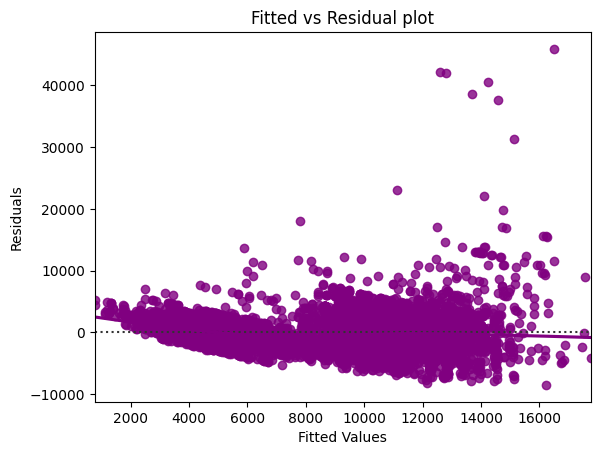

In [79]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

#### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

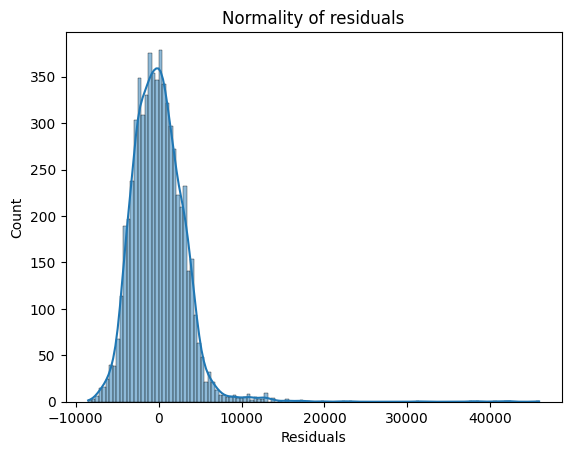

In [80]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

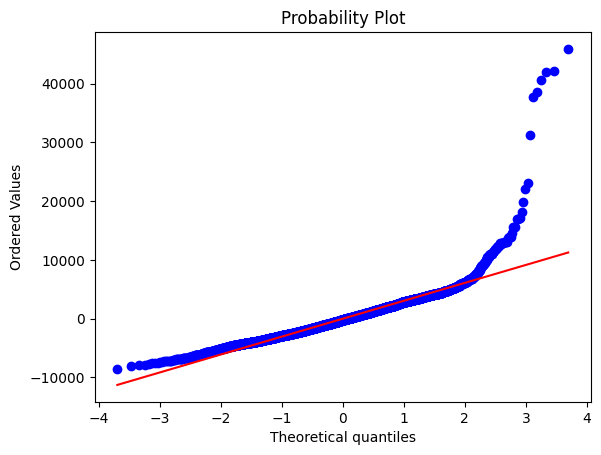

In [81]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [82]:
stats.shapiro(df_pred["Residuals"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8694846034049988, pvalue=0.0)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

#### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [83]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.133489824062051), ('p-value', 0.0002323756280382798)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

#### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [102]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_val, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
3864,6934,1759.789738
3269,9495,10038.439413
6124,14151,11311.021882
5132,4990,4773.343130
2220,6297,6327.751568
5791,7191,10365.262355
5508,11982,5489.879609
8148,13014,12932.954472
2144,4823,5440.974555
9918,8855,9112.517248


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

#### Final Model For Linear Regression

Let's recreate the final model and print it's summary to gain insights.

In [85]:
x_train_final_linear = x_train4.copy()
x_test_final_linear = x_test4.copy()

In [86]:
olsmodel_final = sm.OLS(y_train_linear, x_train_final_linear).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     474.7
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:22:28   Log-Likelihood:                -59696.
No. Observations:                6276   AIC:                         1.194e+05
Df Residuals:                    6262   BIC:                         1.195e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.0112    

In [87]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final_linear, y_train_linear
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3270.937103,2347.046026,0.496332,0.495206,30.64118


In [88]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final_linear, y_val
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3518.751657,2414.756451,0.470127,0.466557,30.67243


* Both the training and test performances show similar trends across all metrics, indicating that the model's performance generalizes well to unseen data. The values of RMSE, MAE, R-squared, adjusted R-squared, and MAPE are comparable between the training and test datasets.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The R-squared values for both training and test datasets are around 0.50, indicating that the model explains approximately 50% of the variance in the target variable (Price). While this is a decent level of explanatory power, it also implies that there are other factors not captured by the model that influence flight prices.

* The MAPE values for both training and test datasets are around 30%, indicating that, on average, the model's predictions deviate from the actual values by approximately 30%.

### Model Building with Tree and other models

In [89]:
scorer = metrics.make_scorer(metrics.r2_score)

In [126]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("DecisionTree", DecisionTreeRegressor(random_state=1)))
models.append(("Bagging", BaggingRegressor(random_state=1)))
models.append(("Random Forest", RandomForestRegressor(random_state=1)))
models.append(("GBM", GradientBoostingRegressor(random_state=1)))
models.append(("Adaboost", AdaBoostRegressor(random_state=1)))
models.append(("Xgboost", XGBRegressor(random_state=1, eval_metric="logloss")))

results_train = []
results_val = []
train_performance = []
val_performance = []

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Training and evaluating models with K-fold cross-validation
for name, model in models:
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', cv=kfold)
    results_train.append((name, cv_result.mean()))

    # Fit model to training data
    model.fit(X_train, y_train)
    train_scores = model_performance_regression(model, X_train, y_train)
    train_performance.append((name, train_scores))

    # Evaluate model on validation data
    y_pred_val = model.predict(X_val)
    val_score = r2_score(y_val, y_pred_val)
    results_val.append((name, val_score))
    val_scores = model_performance_regression(model, X_val, y_val)
    val_performance.append((name, val_scores))

# Displaying performance on training set
print("\nTraining Performance: Average R-squared Score\n")
for name, score in results_train:
    print("{}: {:.2f}".format(name, score))

# Displaying performance on validation set
print("\nValidation Performance: R-squared Score\n")
for name, score in results_val:
    print("{}: {:.2f}".format(name, score))


Training Performance: Average R-squared Score

DecisionTree: 0.77
Bagging: 0.84
Random Forest: 0.86
GBM: 0.78
Adaboost: 0.45
Xgboost: 0.85

Validation Performance: R-squared Score

DecisionTree: 0.74
Bagging: 0.84
Random Forest: 0.84
GBM: 0.82
Adaboost: 0.48
Xgboost: 0.89


In [127]:
train_performance

[('DecisionTree',
           RMSE        MAE  R-squared  Adj. R-squared      MAPE
  0  210.536548  21.483641   0.997913        0.997905  0.255456),
 ('Bagging',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  777.541767  304.094317   0.971539        0.971421  3.403808),
 ('Random Forest',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  656.420555  270.233487   0.979716        0.979631  3.060983),
 ('GBM',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  1981.218015  1223.433062   0.815216        0.814447  14.631658),
 ('Adaboost',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  3254.375403  2719.566949    0.50142        0.499345  43.521047),
 ('Xgboost',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  662.305051  425.490279    0.97935        0.979264  5.360432)]

In [128]:
val_performance

[('DecisionTree',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  2450.115354  847.591973   0.743098        0.739865  9.008605),
 ('Bagging',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  1958.218992  762.547772   0.835897        0.833832  8.249377),
 ('Random Forest',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  1962.270525  733.248606   0.835217        0.833143  7.866168),
 ('GBM',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  2038.675863  1288.609005   0.822135        0.819897  15.001453),
 ('Adaboost',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  3481.649444  2772.996156   0.481242        0.474714  43.201384),
 ('Xgboost',
            RMSE         MAE  R-squared  Adj. R-squared     MAPE
  0  1613.045461  780.212154   0.888651        0.887249  8.66124)]

Based on the average R-squared score on the training and R-squared score on the validation set, three models that perform well are:

1. **Random Forest:** It has a high average R-squared score of 0.86 on the training set and performs consistently well with an R-squared score of 0.84 on the validation set.

2. **Xgboost:** It has a high average R-squared score of 0.85 on the training set and performs exceptionally well with the highest R-squared score of 0.89 on the validation set.

3. **Bagging**: It also performs well with an average R-squared score of 0.84 on the training set and maintains the same R-squared score of 0.84 on the validation set.

These models demonstrate good performance on both the training and validation sets, indicating their potential to capture the underlying patterns in the data. Tuning these models further may lead to even better performance.

### Hyperparameter Tuning - Random Forest

In [123]:
%%time
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [4, 6, 8, 10,None],
    "max_features": ["sqrt", "log2",None],
    "n_estimators": [80, 90, 100, 110, 120],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 11.2 s, sys: 1.1 s, total: 12.3 s
Wall time: 5min 32s


RandomForestRegressor(max_features=None, n_estimators=90, random_state=1)

#### Checking model performance on training set

In [129]:
rf_tuned_model_train_perf= model_performance_regression(rf_tuned,X_train,y_train)
train_performance.append(('Random Forest Tuned', rf_tuned_model_train_perf))
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,652.628294,270.892352,0.979949,0.979866,3.073605


#### Checking model performance on test set

In [130]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned,X_val,y_val)
val_performance.append(('Random Forest Tuned', rf_tuned_model_test_perf))
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1972.161664,734.924359,0.833552,0.831457,7.870437


### Hyperparameter Tuning - Bagging Regressor

In [116]:
%%time
# Choose the type of regressor.
bagging_estimator_tuned = BaggingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}


param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 4.07 s, sys: 205 ms, total: 4.28 s
Wall time: 1min 13s


BaggingRegressor(max_features=0.9, max_samples=0.9, n_estimators=70,
                 random_state=1)

#### Checking model performance on training set

In [131]:
bagging_estimator_tuned_model_train_perf = model_performance_regression(bagging_estimator_tuned,X_train,y_train)
train_performance.append(('Bagging Tuned', bagging_estimator_tuned_model_train_perf))
bagging_estimator_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,739.580028,342.777477,0.97425,0.974143,3.919794


#### Checking model performance on test set

In [132]:
bagging_estimator_tuned_model_test_perf = model_performance_regression(bagging_estimator_tuned,X_val,y_val)
val_performance.append(('Bagging Tuned', bagging_estimator_tuned_model_test_perf))
bagging_estimator_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1946.166383,793.008403,0.837911,0.835871,8.596088


### Hyperparameter Tuning - XGBoost Regressor

In [135]:
%%time
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [75, 100, 125, 150],
    "subsample": [0.7, 0.8, 0.9, 1],
    "gamma": [0, 1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=parameters, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
CPU times: user 37.1 s, sys: 4.97 s, total: 42.1 s
Wall time: 15min 11s


XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=0.9, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

In [136]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned,X_train,y_train)
train_performance.append(('XGB Tuned', xgb_tuned_model_train_perf))
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,517.583062,326.765928,0.987389,0.987336,4.118408


#### Checking model performance on test set

In [137]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned,X_val,y_val)
val_performance.append(('XGB Tuned', xgb_tuned_model_test_perf))
xgb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1777.156459,788.901775,0.864841,0.86314,8.644078


###Model Comparison

In [139]:
# training performance comparison
train_performance.append(('Linear Regression',olsmodel_final_train_perf))
val_performance.append(('Linear Regression',olsmodel_final_test_perf))

In [140]:
train_performance

[('DecisionTree',
           RMSE        MAE  R-squared  Adj. R-squared      MAPE
  0  210.536548  21.483641   0.997913        0.997905  0.255456),
 ('Bagging',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  777.541767  304.094317   0.971539        0.971421  3.403808),
 ('Random Forest',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  656.420555  270.233487   0.979716        0.979631  3.060983),
 ('GBM',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  1981.218015  1223.433062   0.815216        0.814447  14.631658),
 ('Adaboost',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  3254.375403  2719.566949    0.50142        0.499345  43.521047),
 ('Xgboost',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  662.305051  425.490279    0.97935        0.979264  5.360432),
 ('Random Forest Tuned',
           RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  652.628294  270.8

In [141]:
val_performance

[('DecisionTree',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  2450.115354  847.591973   0.743098        0.739865  9.008605),
 ('Bagging',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  1958.218992  762.547772   0.835897        0.833832  8.249377),
 ('Random Forest',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  1962.270525  733.248606   0.835217        0.833143  7.866168),
 ('GBM',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  2038.675863  1288.609005   0.822135        0.819897  15.001453),
 ('Adaboost',
            RMSE          MAE  R-squared  Adj. R-squared       MAPE
  0  3481.649444  2772.996156   0.481242        0.474714  43.201384),
 ('Xgboost',
            RMSE         MAE  R-squared  Adj. R-squared     MAPE
  0  1613.045461  780.212154   0.888651        0.887249  8.66124),
 ('Random Forest Tuned',
            RMSE         MAE  R-squared  Adj. R-squared      MAPE
  0  1972.161

Based on the summary provided, the top 2 models for predicting the price of airlines would be:

1. XGB Tuned:
   - This model achieved the highest R-squared score in both the training and validation datasets, indicating its superior predictive performance.
   - It also has relatively low RMSE and MAE values compared to other models, suggesting good accuracy in predicting the price.

2. Random Forest Tuned:
   - The Random Forest Tuned model also performed well in both training and validation datasets, with high R-squared scores and relatively low RMSE and MAE values.
   - While its R-squared score is slightly lower than that of XGB Tuned, it still demonstrates strong predictive power.

Therefore, based on the provided data, the XGB Tuned and Random Forest Tuned models are the top 2 choices for predicting the price of airlines.

### Important features of the best model

####XGB Tuned

In [145]:
xgb_tuned_model_final = model_performance_regression(xgb_tuned,X_test,y_test)
xgb_tuned_model_final

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1279.826684,757.642804,0.917368,0.916328,8.981642


Test performance scores for the XGB Tuned model:

- RMSE: 1279.83
- MAE: 757.64
- R-squared: 0.9174
- Adj. R-squared: 0.9163
- MAPE: 8.98%

It's evident that the model performs consistently well on the test data, indicating that it's a reliable choice for predicting airline prices in real-world scenarios. Therefore, the XGB Tuned model remains a top contender for predicting airline prices.



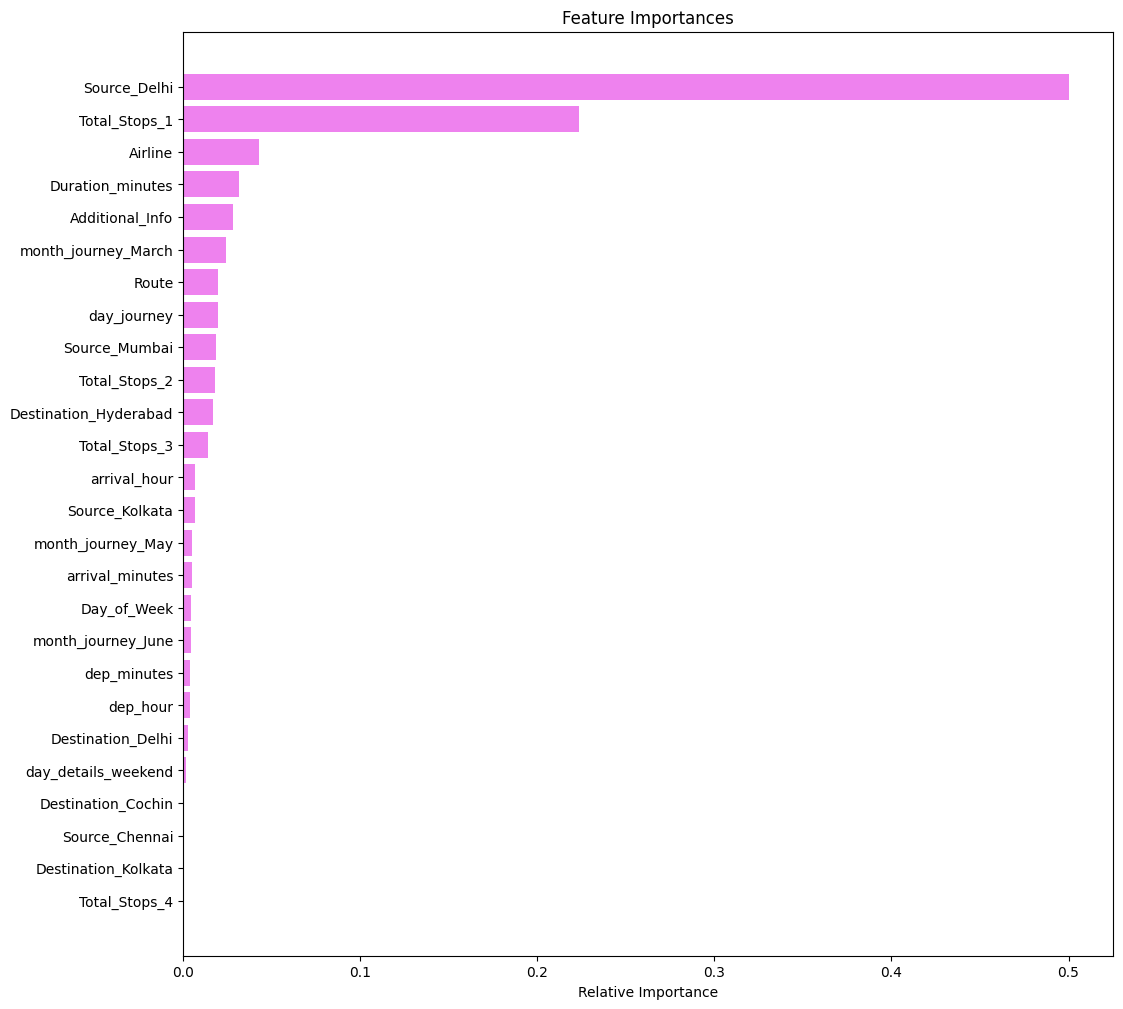

In [153]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [154]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
11,Source_Delhi,0.500234
18,Total_Stops_1,0.223582
0,Airline,0.042543
3,Duration_minutes,0.031561
2,Additional_Info,0.028315
23,month_journey_March,0.024240
1,Route,0.019671
4,day_journey,0.019375
13,Source_Mumbai,0.018448
19,Total_Stops_2,0.017962



1. **Source_Delhi (0.500234)**: This feature has the highest importance, indicating that flights originating from Delhi significantly influence the model's predictions.

2. **Total_Stops_1 (0.223582)**: The number of stops being 1 is the second most important feature. Flights with fewer stops tend to have higher importance in predicting the price.

3. **Airline (0.042543)**: While not as influential as the previous two features, the airline also plays a significant role in determining the flight price.

4. **Duration_minutes (0.031561)**: The duration of the flight in minutes is another important predictor, suggesting that longer flights may have higher prices.

5. **Additional_Info (0.028315)**: This feature, which likely contains additional information about the flight, also contributes significantly to predicting the price.

6. **month_journey_March (0.024240)**: Flights in March seem to have relatively higher importance compared to other months, indicating seasonal variations.

7. **Route (0.019671)**: The specific route taken by the flight has some importance, although it's not as significant as other features.

8. **day_journey (0.019375)**: The day of the journey also plays a role, suggesting that prices may vary depending on the day of the week.

9. **Source_Mumbai (0.018448)**: Flights originating from Mumbai have a moderate importance in predicting the price.

10. **Total_Stops_2 (0.017962)**: The number of stops being 2 also contributes to predicting the flight price, although not as much as flights with only 1 stop.

Overall, these features collectively influence the model's predictions, with Source_Delhi, Total_Stops_1, and Airline being the most influential in determining flight prices.

####Random Forest Tuned

In [150]:
rf_tuned_model_final = model_performance_regression(rf_tuned,X_test,y_test)
rf_tuned_model_final

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1336.472557,677.633791,0.909892,0.908758,7.934776


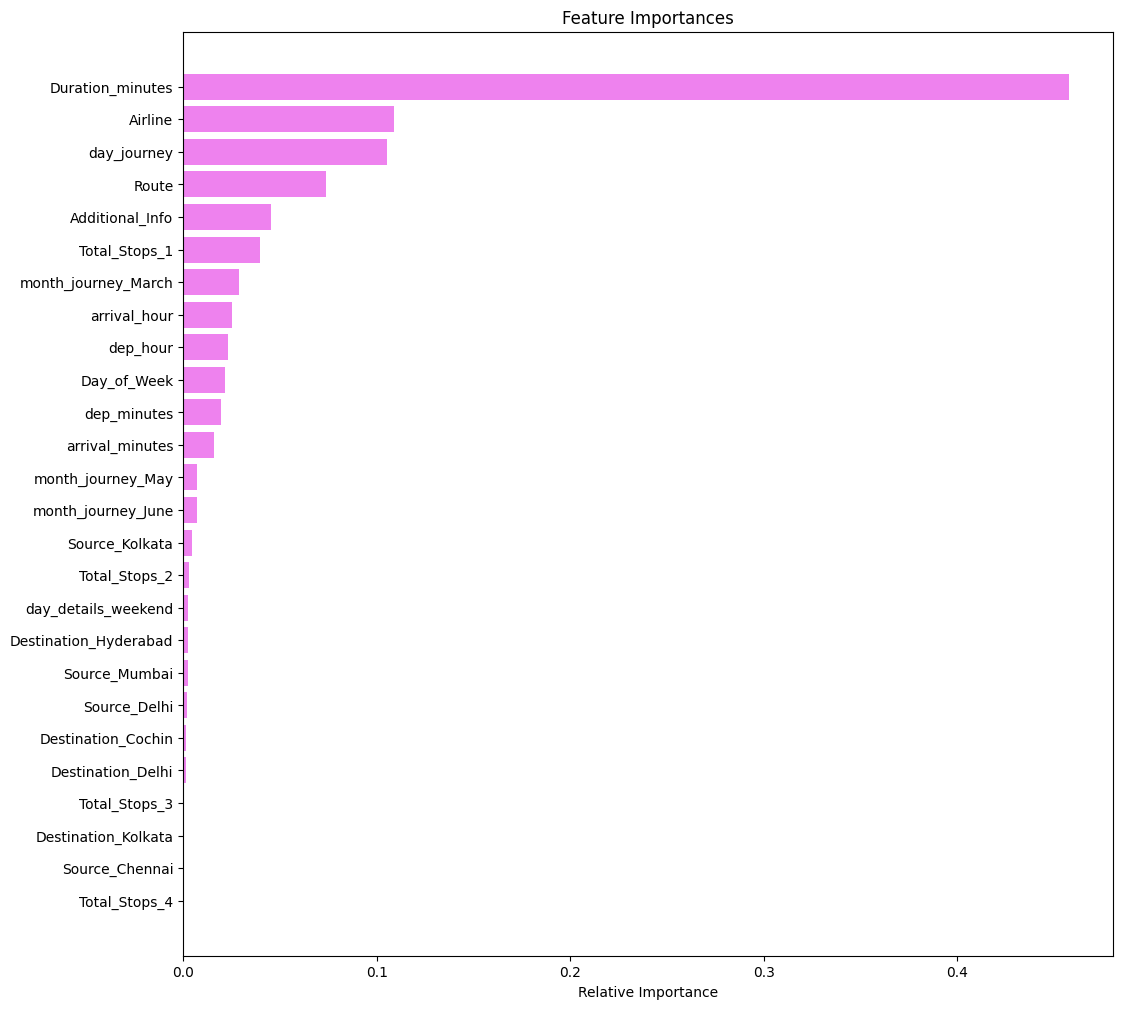

In [156]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [157]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,Duration_minutes,0.457792
0,Airline,0.109095
4,day_journey,0.105126
1,Route,0.073691
2,Additional_Info,0.045579
18,Total_Stops_1,0.039751
23,month_journey_March,0.028753
5,arrival_hour,0.025218
7,dep_hour,0.023276
9,Day_of_Week,0.021611


Based on the feature importances provided for the Random Forest tuned model:

1. **Duration_minutes (0.457792)**: The duration of the flight in minutes is the most important feature, indicating that flight duration significantly influences the model's predictions.

2. **Airline (0.109095)**: The airline operating the flight is the second most important feature, suggesting that different airlines may have different pricing strategies.

3. **day_journey (0.105126)**: The day of the journey also plays a significant role in determining the flight price, with certain days potentially having higher prices than others.

4. **Route (0.073691)**: The specific route taken by the flight contributes to predicting the price, although not as much as flight duration or the airline.

5. **Additional_Info (0.045579)**: This feature, likely containing additional information about the flight, also has a moderate importance in predicting the price.

6. **Total_Stops_1 (0.039751)**: Flights with only 1 stop have some importance in predicting the price, suggesting that the number of stops affects the price.

7. **month_journey_March (0.028753)**: Flights in March seem to have relatively higher importance compared to other months, indicating seasonal variations.

8. **arrival_hour (0.025218)**: The arrival hour contributes to predicting the price, suggesting that the time of arrival may impact pricing.

9. **dep_hour (0.023276)**: Similarly, the departure hour also plays a role in determining the flight price.

10. **Day_of_Week (0.021611)**: The day of the week on which the flight occurs influences the price, with certain days having higher importance than others.

These features collectively influence the Random Forest model's predictions, with flight duration, airline, and day of the journey being the most influential factors.

##Insights and Next Steps

Based on the feature importance analysis for both the XGBoost tuned model and the Random Forest tuned model, here are the top 10 features that significantly influence the flight price prediction process:

**XGBoost Tuned Model:**
1. Source_Delhi
2. Total_Stops_1
3. Airline
4. Duration_minutes
5. Additional_Info
6. month_journey_March
7. Route
8. day_journey
9. Source_Mumbai
10. Total_Stops_2

**Random Forest Tuned Model:**
1. Duration_minutes
2. Airline
3. day_journey
4. Route
5. Additional_Info
6. Total_Stops_1
7. month_journey_March
8. arrival_hour
9. dep_hour
10. Day_of_Week

Insights:
- Both models highlight the importance of flight duration, indicating that longer flights tend to have higher prices.
- The choice of airline plays a significant role in determining the price, with certain airlines likely to charge higher fares.
- The day of the journey, route, and additional information about the flight also contribute significantly to the price prediction process.
- Features such as the total number of stops, the month of the journey, and the day of the week have varying degrees of importance across models but remain influential factors.

Next Steps:
1. **Model Refinement**: Further fine-tuning of the selected model (XGBoost) could potentially improve its performance by adjusting hyperparameters or exploring ensemble techniques.
2. **Feature Engineering**: Investigate additional features or transformations that could enhance the predictive power of the model, such as interaction terms or derived features.
3. **Data Enhancement**: Consider collecting or incorporating additional data sources that may provide valuable insights into flight pricing, such as historical ticket sales data, economic indicators, or weather conditions.
4. **Model Deployment**: Once satisfied with the model's performance, deploy it into a production environment where it can be used to provide real-time flight price predictions for users.
5. **Monitoring and Maintenance**: Continuously monitor the model's performance in the production environment and periodically retrain it with new data to ensure its predictions remain accurate and reliable over time.